In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#10 Train data

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Group01_Assignment4_code/UnivariateData/train10.csv')
X_train = data[['x']]
y_train = data['y']

data = pd.read_csv('/content/drive/MyDrive/Group01_Assignment4_code/UnivariateData/test1.csv')
X_test= data[['x']]
y_test = data['y']

# Function to perform polynomial regression with regularization (Ridge) from scratch
def polynomial_regression(X_train, y_train, degree, alpha=0.0):
    X_train_poly = np.c_[np.ones(X_train.shape[0]), X_train]
    for d in range(2, degree + 1):
        X_train_poly = np.c_[X_train_poly, X_train ** d]

    # Compute weights using Ridge regression formula (without matrix inversion)
    identity = np.eye(X_train_poly.shape[1])
    weights = np.linalg.inv(X_train_poly.T.dot(X_train_poly) + alpha * identity).dot(X_train_poly.T).dot(y_train)

    return weights

# Function to predict using polynomial regression from scratch
def predict(X_train, weights, degree):
    X_train_poly = np.c_[np.ones(X_train.shape[0]), X_train]
    for d in range(2, degree + 1):
        X_train_poly = np.c_[X_train_poly, X_train ** d]
    return X_train_poly.dot(weights)

# Define the degrees of the polynomial
degrees = np.arange(2, 10)

# Define the values of alpha (regularization parameter)
alphas = [1e-10, 1e-18, 1e-20, 1e-30]


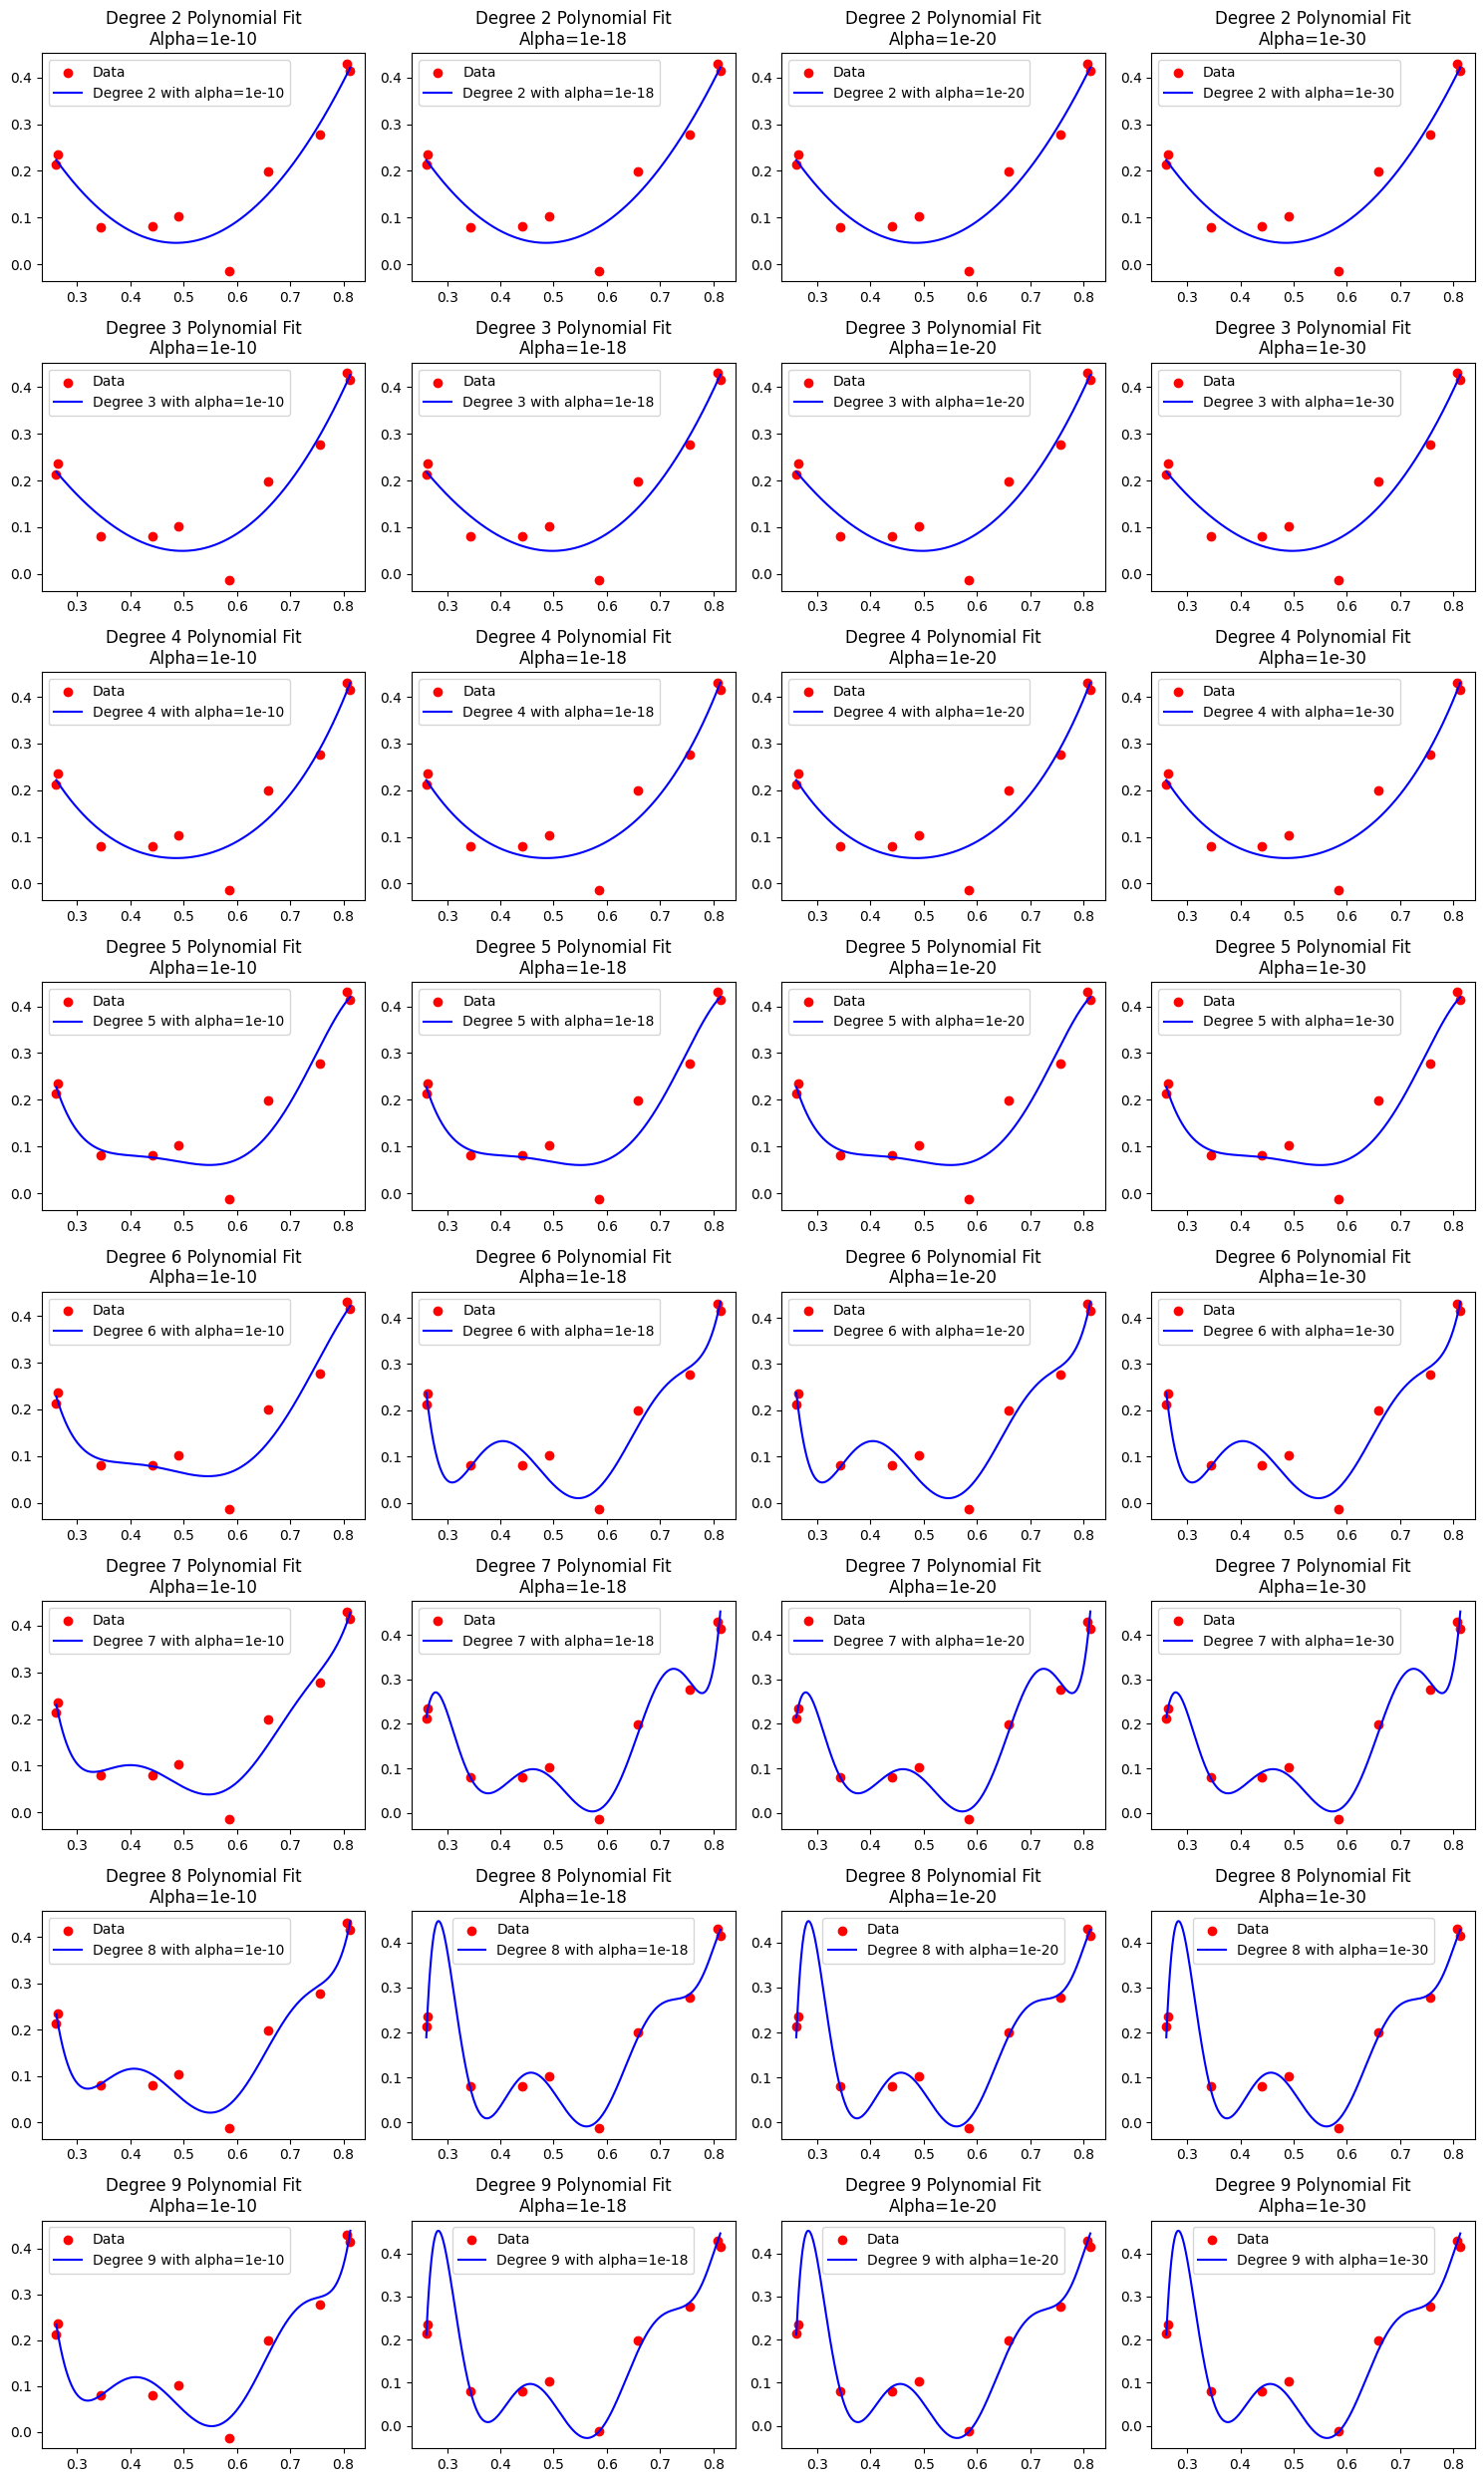

In [7]:
# Create subplots for different degrees of polynomials
fig, axs = plt.subplots(len(degrees), len(alphas), figsize=(15, 25))

for i, degree in enumerate(degrees):
    for j, alpha in enumerate(alphas):
        # Perform polynomial regression to get weights
        weights = polynomial_regression(X_train.values, y_train.values, degree, alpha)

        # Plot the data points
        axs[i,j].scatter(X_train, y_train, color='red', label='Data')

        # Plot the approximated function
        x_range = np.linspace(X_train.min().values, X_train.max().values, 1000)
        y_pred = predict(x_range, weights, degree)
        axs[i,j].plot(x_range, y_pred, color='blue', label=f'Degree {degree} with alpha={alpha}')
        axs[i,j].set_title(f'Degree {degree} Polynomial Fit\nAlpha={alpha}')
        axs[i,j].legend()

plt.tight_layout()
plt.show()


In [8]:
best_degree = None
best_alpha = None
best_mse = float('inf')  # Initialize with a high value
#print('best_mse:',best_mse)

for i, degree in enumerate(degrees):
    for j, alpha in enumerate(alphas):
        # Perform polynomial regression to get weights
        weights = polynomial_regression(X_train.values, y_train.values, degree, alpha)

        # Calculate mean squared error or any other evaluation metric
        y_pred = predict(X_test.values, weights, degree)
        mse = np.mean((y_test - y_pred) ** 2)

        # Check if this model has the lowest MSE
        if mse < best_mse:
            best_mse = mse
            print('best_mse:',best_mse)
            best_degree = degree
            best_alpha = alpha

            # Get the weights before regularization
            X_train_poly = np.c_[np.ones(X_train.shape[0]), X_train]
            for d in range(2, best_degree + 1):
                X_train_poly = np.c_[X_train_poly, X_train.values ** d]
            weights_before_reg = np.linalg.lstsq(X_train_poly, y_train, rcond=None)[0]

            # Set alpha to 0 to turn off regularization and get weights after regularization
            X_poly_reg = np.c_[np.ones(X_train.shape[0]), X_train]
            for d in range(2, best_degree + 1):
                X_poly_reg = np.c_[X_poly_reg, X_train.values ** d]
            weights_after_reg = np.linalg.lstsq(X_poly_reg.T.dot(X_poly_reg) + best_alpha * np.eye(X_poly_reg.shape[1]),
                                                 X_poly_reg.T.dot(y_train), rcond=None)[0]
        print(f'Degree: {degree}, Alpha: {alpha}')
        print(f'Weights before regularization: {weights_before_reg}')
        print(f'Weights after regularization: {weights_after_reg}')
        print('=' * 30)


best_mse: 0.006581392253397674
Degree: 2, Alpha: 1e-10
Weights before regularization: [ 0.87334897 -3.40652611  3.50631355]
Weights after regularization: [ 0.87334895 -3.40652603  3.50631347]
best_mse: 0.006581391445641199
Degree: 2, Alpha: 1e-18
Weights before regularization: [ 0.87334897 -3.40652611  3.50631355]
Weights after regularization: [ 0.87334897 -3.40652611  3.50631355]
Degree: 2, Alpha: 1e-20
Weights before regularization: [ 0.87334897 -3.40652611  3.50631355]
Weights after regularization: [ 0.87334897 -3.40652611  3.50631355]
Degree: 2, Alpha: 1e-30
Weights before regularization: [ 0.87334897 -3.40652611  3.50631355]
Weights after regularization: [ 0.87334897 -3.40652611  3.50631355]
Degree: 3, Alpha: 1e-10
Weights before regularization: [ 0.87334897 -3.40652611  3.50631355]
Weights after regularization: [ 0.87334897 -3.40652611  3.50631355]
Degree: 3, Alpha: 1e-18
Weights before regularization: [ 0.87334897 -3.40652611  3.50631355]
Weights after regularization: [ 0.873348

In [9]:
# Print the best degree, alpha, and corresponding weights before and after regularization
print(f'Best Degree: {best_degree}')
print(f'Best Alpha: {best_alpha}')
print(f'Weights before regularization: {weights_before_reg}')
print(f'Weights after regularization: {weights_after_reg}')
print(f'Best Mean Squared Error: {best_mse}')

Best Degree: 2
Best Alpha: 1e-18
Weights before regularization: [ 0.87334897 -3.40652611  3.50631355]
Weights after regularization: [ 0.87334897 -3.40652611  3.50631355]
Best Mean Squared Error: 0.006581391445641199


## **MSE**

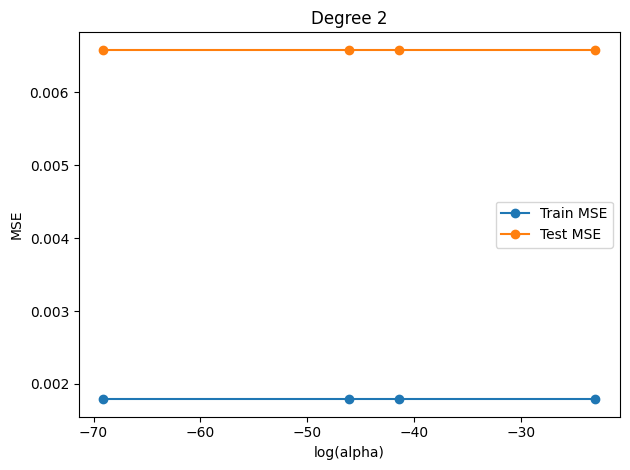

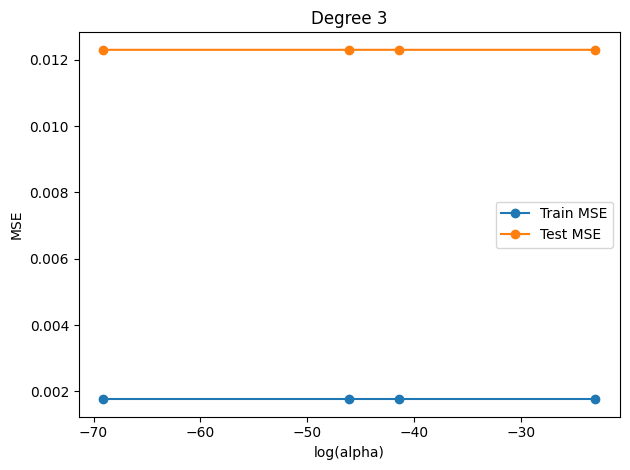

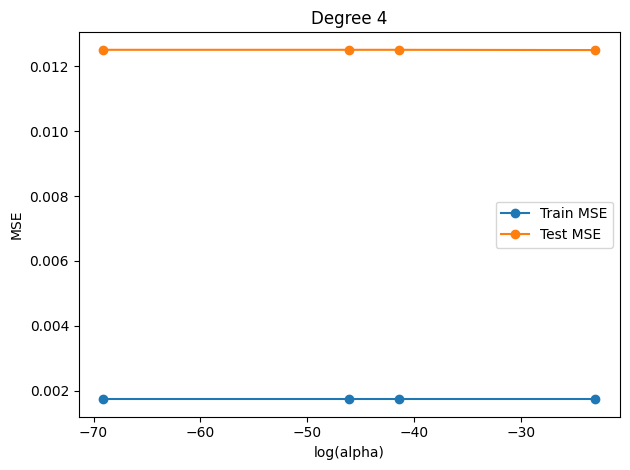

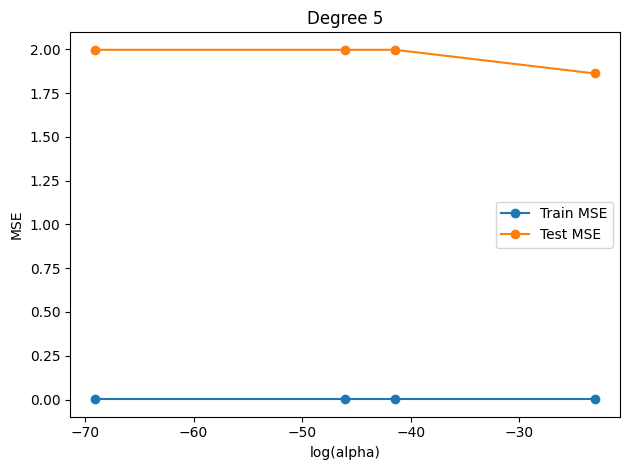

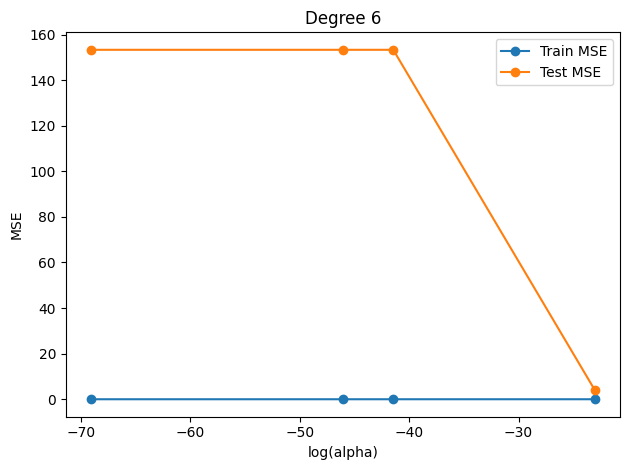

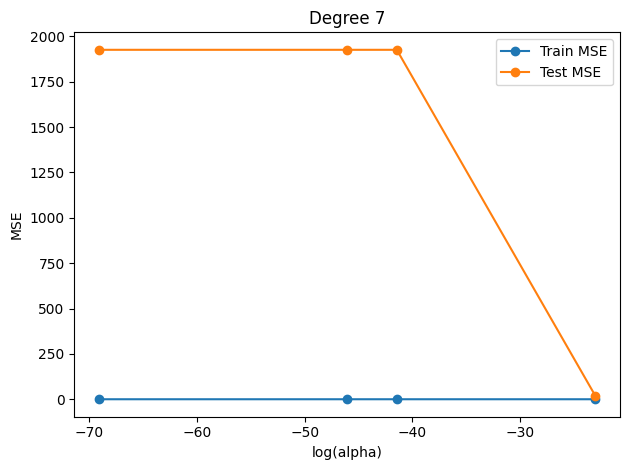

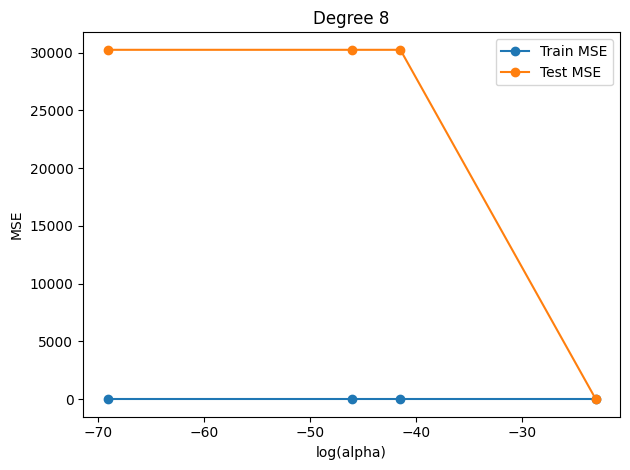

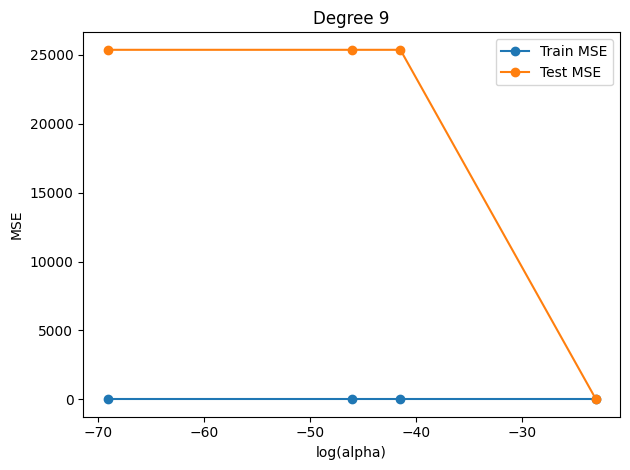

In [10]:
# Initialize arrays to store MSE values
train_mses = np.zeros((len(degrees), len(alphas)))
test_mses = np.zeros((len(degrees), len(alphas)))

# Split data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to perform polynomial regression with regularization (Ridge)
def polynomial_regression(X_train, y_train, degree, alpha=0.0):
    X_train_poly = np.c_[np.ones(X_train.shape[0]), X_train]  # Add a column of ones for the bias term
    for d in range(2, degree + 1):
        X_train_poly = np.c_[X_train_poly, X_train ** d]  # Add polynomial features up to the specified degree

    # Compute weights using Ridge regression formula (without matrix inversion)
    identity = np.eye(X_train_poly.shape[1])
    weights = np.linalg.inv(X_train_poly.T.dot(X_train_poly) + alpha * identity).dot(X_train_poly.T).dot(y_train)

    return weights

# Function to predict using polynomial regression
def predict(X_train, weights):
    X_train_poly = np.c_[np.ones(X_train.shape[0]), X_train]  # Add a column of ones for the bias term
    for d in range(2, len(weights)):
        X_train_poly = np.c_[X_train_poly, X_train ** d]  # Add polynomial features up to the specified degree
    return X_train_poly.dot(weights)

# Iterate over degrees and alphas and calculate MSE for each combination
for i, degree in enumerate(degrees):
    for j, alpha in enumerate(alphas):
        # Perform polynomial regression to get weights
        weights = polynomial_regression(X_train.values, y_train.values, degree, alpha)

        # Predict on training and test data
        y_train_pred = predict(X_train.values, weights)
        y_test_pred = predict(X_test.values, weights)

        # Calculate MSE for training and test data
        train_mse = np.mean((y_train - y_train_pred) ** 2)
        test_mse = np.mean((y_test - y_test_pred) ** 2)

        # Store MSE values
        train_mses[i, j] = train_mse
        test_mses[i, j] = test_mse

# Plot MSE values
#fig, axs = plt.subplots(len(degrees), 1, figsize=(8, 6), sharex=True)

for i, degree in enumerate(degrees):
    plt.plot(np.log(alphas), train_mses[i, :], label='Train MSE', marker='o')
    plt.plot(np.log(alphas), test_mses[i, :], label='Test MSE', marker='o')
    plt.title(f'Degree {degree}')
    plt.ylabel('MSE')
    plt.legend()

    plt.xlabel('log(alpha)')
    plt.tight_layout()
    plt.show()

## **Model output vs Training output**

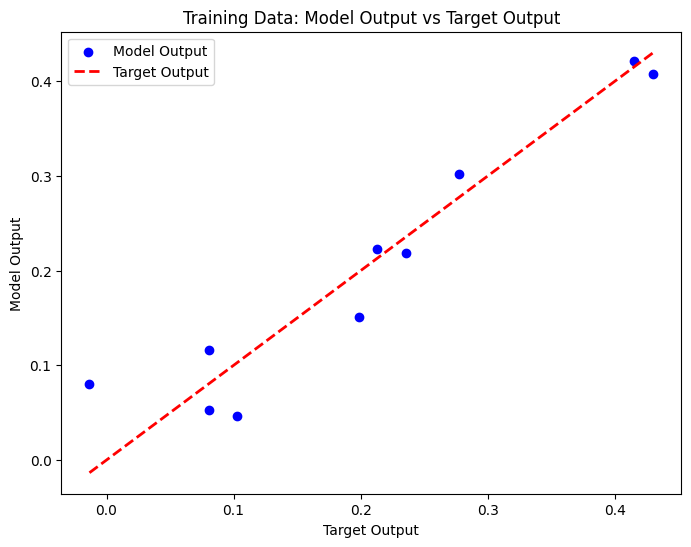

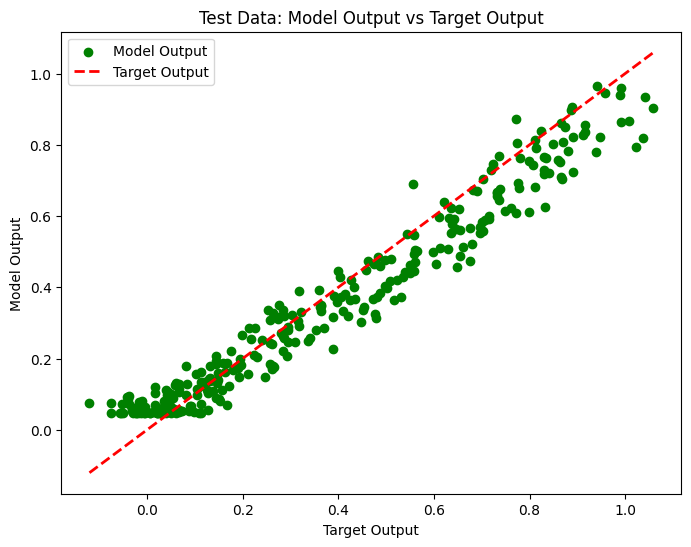

In [11]:
# Define functions for polynomial regression and Ridge regression with regularization

def polynomial_features(X_train, degree):
    X_train_poly = np.ones((X_train.shape[0], 1))
    for d in range(1, degree + 1):
        X_train_poly = np.concatenate((X_train_poly, X_train ** d), axis=1)
    return X_train_poly

def ridge_regression(X_train, y_train, alpha=0.0):
    identity = np.eye(X_train.shape[1])
    weights = np.linalg.inv(X_train.T.dot(X_train) + alpha * identity).dot(X_train.T).dot(y_train)
    return weights

# best_degree and best_alpha are obtained from cross-validation results
best_degree = 2
best_alpha = 1e-10

# Perform polynomial regression with regularization
X_train_poly = polynomial_features(X_train, best_degree)
X_test_poly = polynomial_features(X_test, best_degree)

# Add a column of ones for the bias term
X_train_poly = np.c_[np.ones(X_train_poly.shape[0]), X_train_poly]
X_test_poly = np.c_[np.ones(X_test_poly.shape[0]), X_test_poly]

# Compute weights using Ridge regression with the best alpha
weights = ridge_regression(X_train_poly, y_train, alpha=best_alpha)

# Predictions on training and test data
y_train_pred = X_train_poly.dot(weights)
y_test_pred = X_test_poly.dot(weights)

# Plot model output vs target output for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Model Output')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2, label='Target Output')
plt.xlabel('Target Output')
plt.ylabel('Model Output')
plt.title('Training Data: Model Output vs Target Output')
plt.legend()
plt.show()

# Plot model output vs target output for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Model Output')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Target Output')
plt.xlabel('Target Output')
plt.ylabel('Model Output')
plt.title('Test Data: Model Output vs Target Output')
plt.legend()
plt.show()


#50 training

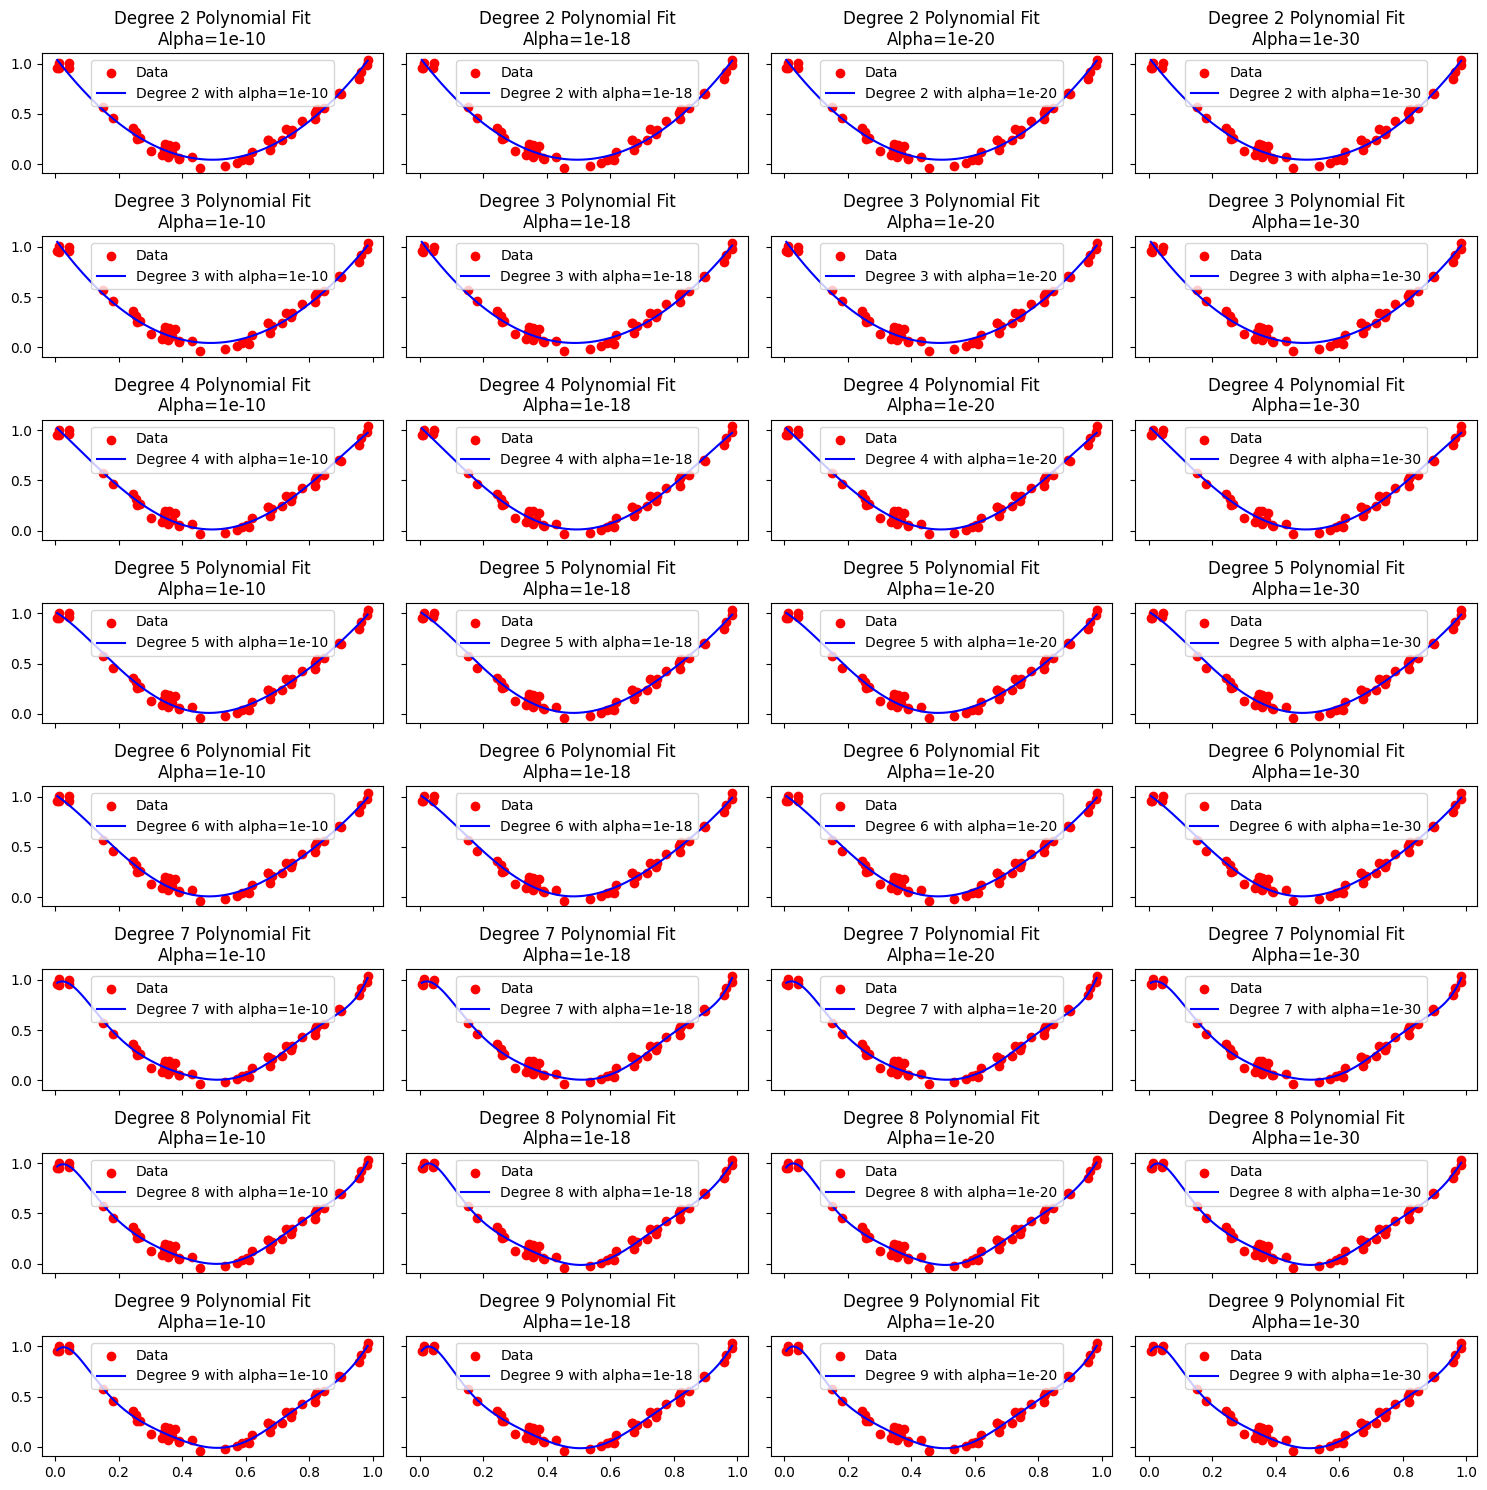

In [13]:
data = pd.read_csv('/content/drive/MyDrive/Group01_Assignment4_code/UnivariateData/train50.csv')
X_train = data[['x']]
y_train = data['y']

data = pd.read_csv('/content/drive/MyDrive/Group01_Assignment4_code/UnivariateData/test1.csv')
X_test= data[['x']]
y_test = data['y']

#  Function to perform polynomial regression with regularization (Ridge) from scratch
def polynomial_regression(X_train, y_train, degree, alpha=0.0):
    X_train_poly = np.c_[np.ones(X_train.shape[0]), X_train]
    for d in range(2, degree + 1):
        X_train_poly = np.c_[X_train_poly, X_train ** d]

    # Compute weights using Ridge regression formula (without matrix inversion)
    identity = np.eye(X_train_poly.shape[1])
    weights = np.linalg.inv(X_train_poly.T.dot(X_train_poly) + alpha * identity).dot(X_train_poly.T).dot(y_train)

    return weights

# Function to predict using polynomial regression from scratch
def predict(X_train, weights, degree):
    X_train_poly = np.c_[np.ones(X_train.shape[0]), X_train]
    for d in range(2, degree + 1):
        X_train_poly = np.c_[X_train_poly, X_train ** d]
    return X_train_poly.dot(weights)

# Define the degrees of the polynomial
degrees = np.arange(2, 10)

# Define the values of alpha (regularization parameter)
alphas = [1e-10, 1e-18, 1e-20, 1e-30]

# Create subplots for different degrees of polynomials
fig, axs = plt.subplots(len(degrees), len(alphas), figsize=(15, 15), sharex=True, sharey=True)

for i, degree in enumerate(degrees):
    for j, alpha in enumerate(alphas):
        # Perform polynomial regression to get weights
        weights = polynomial_regression(X_train.values, y_train.values, degree, alpha)

        # Plot the data points
        axs[i, j].scatter(X_train, y_train, color='red', label='Data')

        # Plot the approximated function
        x_range = np.linspace(X_train.min().values, X_train.max().values, 1000)
        y_pred = predict(x_range, weights, degree)
        axs[i, j].plot(x_range, y_pred, color='blue', label=f'Degree {degree} with alpha={alpha}')
        axs[i, j].set_title(f'Degree {degree} Polynomial Fit\nAlpha={alpha}')
        axs[i, j].legend()

plt.tight_layout()
plt.show()


In [14]:
best_degree = None
best_alpha = None
best_mse = float('inf')  # Initialize with a high value
#print('best_mse:',best_mse)

for i, degree in enumerate(degrees):
    for j, alpha in enumerate(alphas):
        # Perform polynomial regression to get weights
        weights = polynomial_regression(X_train.values, y_train.values, degree, alpha)

        # Calculate mean squared error or any other evaluation metric
        y_pred = predict(X_test.values, weights, degree)
        mse = np.mean((y_test - y_pred) ** 2)

        # Check if this model has the lowest MSE
        if mse < best_mse:
            best_mse = mse
            print('best_mse:',best_mse)
            best_degree = degree
            best_alpha = alpha

            # Get the weights before regularization
            X_train_poly = np.c_[np.ones(X_train.shape[0]), X_train]
            for d in range(2, best_degree + 1):
                X_train_poly = np.c_[X_train_poly, X_train.values ** d]
            weights_before_reg = np.linalg.lstsq(X_train_poly, y_train, rcond=None)[0]

            # Set alpha to 0 to turn off regularization and get weights after regularization
            X_poly_reg = np.c_[np.ones(X_train.shape[0]), X_train]
            for d in range(2, best_degree + 1):
                X_poly_reg = np.c_[X_poly_reg, X_train.values ** d]
            weights_after_reg = np.linalg.lstsq(X_poly_reg.T.dot(X_poly_reg) + best_alpha * np.eye(X_poly_reg.shape[1]),
                                                 X_poly_reg.T.dot(y_train), rcond=None)[0]
        print(f'Degree: {degree}, Alpha: {alpha}')
        print(f'Weights before regularization: {weights_before_reg}')
        print(f'Weights after regularization: {weights_after_reg}')
        print('=' * 30)


best_mse: 0.004320350259381361
Degree: 2, Alpha: 1e-10
Weights before regularization: [ 1.06540968 -4.11605355  4.14502788]
Weights after regularization: [ 1.06540968 -4.11605355  4.14502788]
Degree: 2, Alpha: 1e-18
Weights before regularization: [ 1.06540968 -4.11605355  4.14502788]
Weights after regularization: [ 1.06540968 -4.11605355  4.14502788]
Degree: 2, Alpha: 1e-20
Weights before regularization: [ 1.06540968 -4.11605355  4.14502788]
Weights after regularization: [ 1.06540968 -4.11605355  4.14502788]
Degree: 2, Alpha: 1e-30
Weights before regularization: [ 1.06540968 -4.11605355  4.14502788]
Weights after regularization: [ 1.06540968 -4.11605355  4.14502788]
Degree: 3, Alpha: 1e-10
Weights before regularization: [ 1.06540968 -4.11605355  4.14502788]
Weights after regularization: [ 1.06540968 -4.11605355  4.14502788]
Degree: 3, Alpha: 1e-18
Weights before regularization: [ 1.06540968 -4.11605355  4.14502788]
Weights after regularization: [ 1.06540968 -4.11605355  4.14502788]
Deg

In [15]:
# Print the best degree, alpha, and corresponding weights before and after regularization
print(f'Best Degree: {best_degree}')
print(f'Best Alpha: {best_alpha}')
print(f'Weights before regularization: {weights_before_reg}')
print(f'Weights after regularization: {weights_after_reg}')
print(f'Best Mean Squared Error: {best_mse}')

Best Degree: 2
Best Alpha: 1e-10
Weights before regularization: [ 1.06540968 -4.11605355  4.14502788]
Weights after regularization: [ 1.06540968 -4.11605355  4.14502788]
Best Mean Squared Error: 0.004320350259381361


## **MSE**

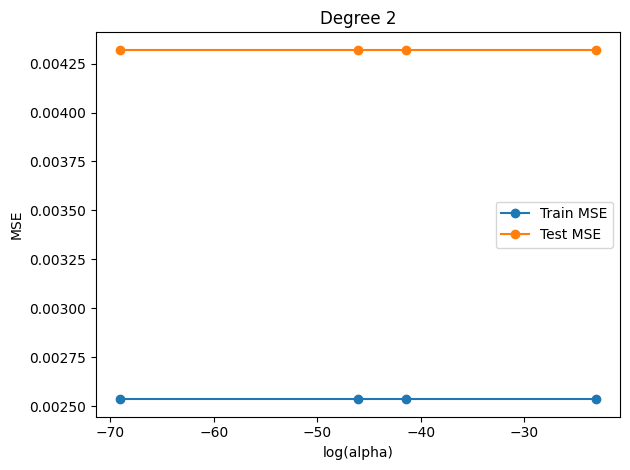

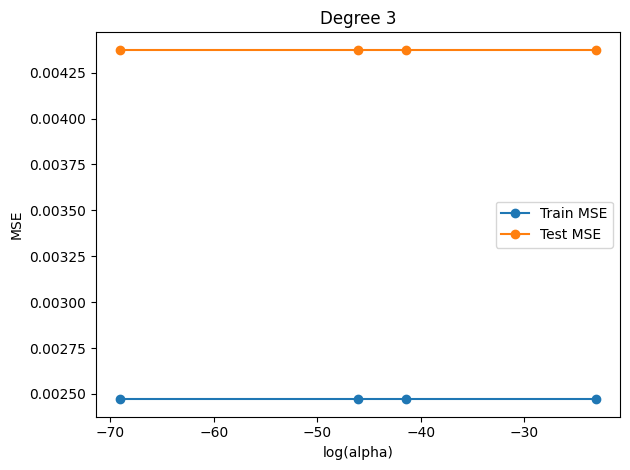

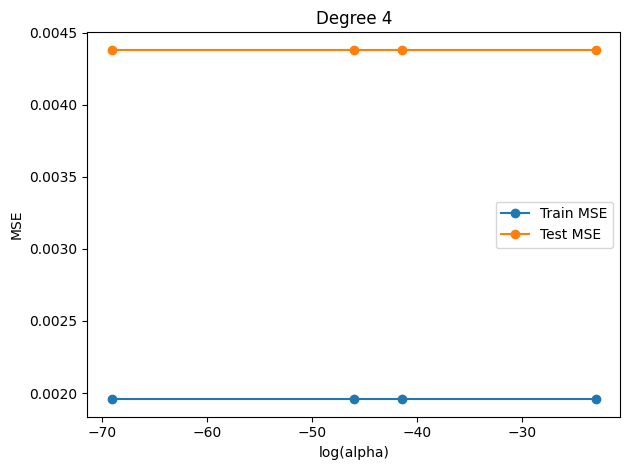

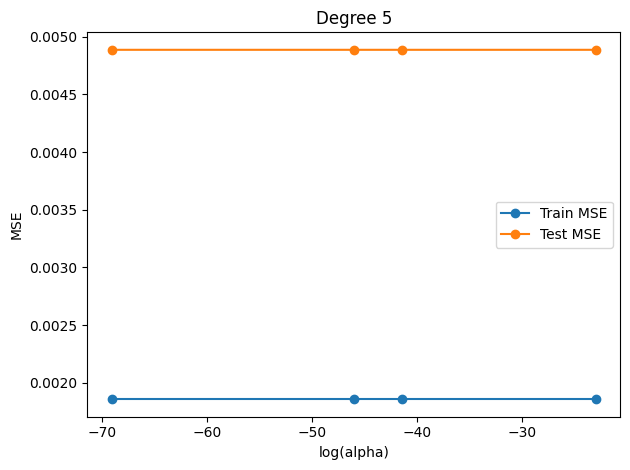

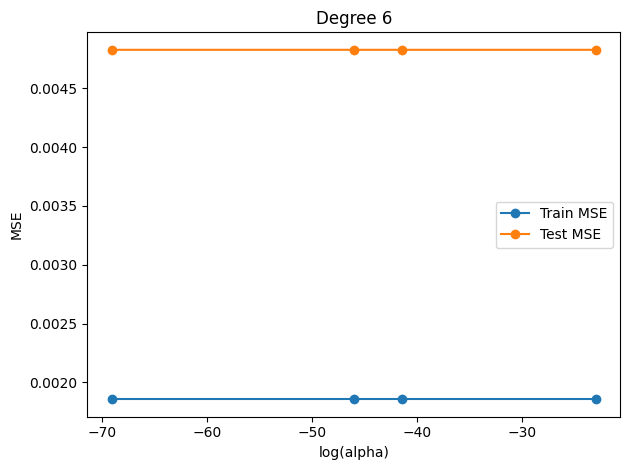

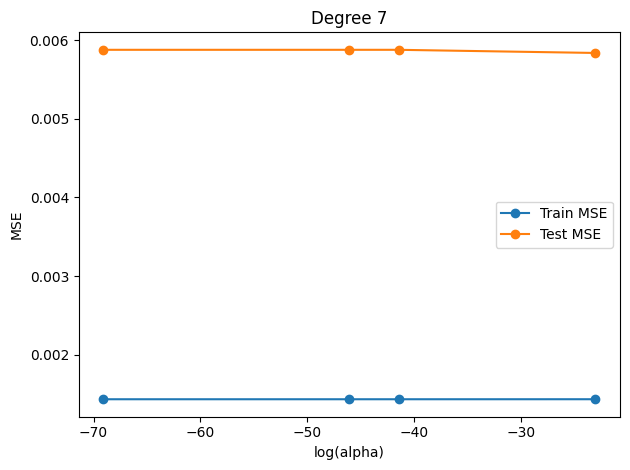

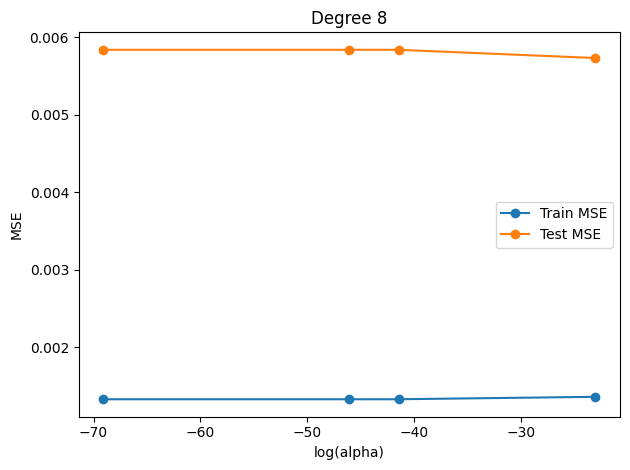

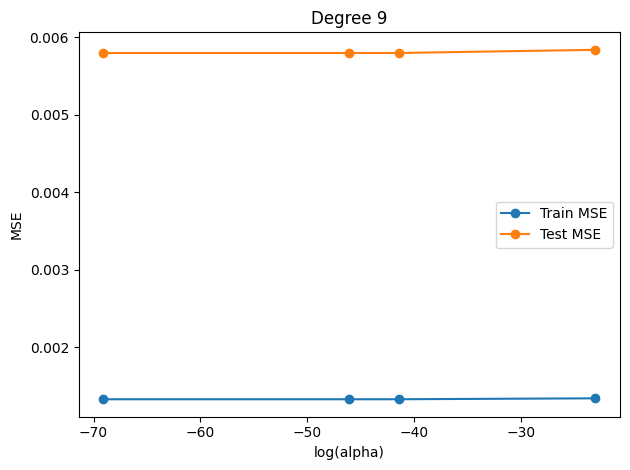

In [16]:
# Initialize arrays to store MSE values
train_mses = np.zeros((len(degrees), len(alphas)))
test_mses = np.zeros((len(degrees), len(alphas)))

# Split data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to perform polynomial regression with regularization (Ridge)
def polynomial_regression(X_train, y_train, degree, alpha=0.0):
    X_train_poly = np.c_[np.ones(X_train.shape[0]), X_train]  # Add a column of ones for the bias term
    for d in range(2, degree + 1):
        X_train_poly = np.c_[X_train_poly, X_train ** d]  # Add polynomial features up to the specified degree

    # Compute weights using Ridge regression formula (without matrix inversion)
    identity = np.eye(X_train_poly.shape[1])
    weights = np.linalg.inv(X_train_poly.T.dot(X_train_poly) + alpha * identity).dot(X_train_poly.T).dot(y_train)

    return weights

# Function to predict using polynomial regression
def predict(X_train, weights):
    X_train_poly = np.c_[np.ones(X_train.shape[0]), X_train]  # Add a column of ones for the bias term
    for d in range(2, len(weights)):
        X_train_poly = np.c_[X_train_poly, X_train ** d]  # Add polynomial features up to the specified degree
    return X_train_poly.dot(weights)


# Iterate over degrees and alphas and calculate MSE for each combination
for i, degree in enumerate(degrees):
    for j, alpha in enumerate(alphas):
        # Perform polynomial regression to get weights
        weights = polynomial_regression(X_train.values, y_train.values, degree, alpha)

        # Predict on training and test data
        y_train_pred = predict(X_train.values, weights)
        y_test_pred = predict(X_test.values, weights)

        # Calculate MSE for training and test data
        train_mse = np.mean((y_train - y_train_pred) ** 2)
        test_mse = np.mean((y_test - y_test_pred) ** 2)

        # Store MSE values
        train_mses[i, j] = train_mse
        test_mses[i, j] = test_mse

# Plot MSE values
#fig, axs = plt.subplots(len(degrees), 1, figsize=(8, 6), sharex=True)

for i, degree in enumerate(degrees):
    plt.plot(np.log(alphas), train_mses[i, :], label='Train MSE', marker='o')
    plt.plot(np.log(alphas), test_mses[i, :], label='Test MSE', marker='o')
    plt.title(f'Degree {degree}')
    plt.ylabel('MSE')
    plt.legend()

    plt.xlabel('log(alpha)')
    plt.tight_layout()
    plt.show()

## Model output vs Target output

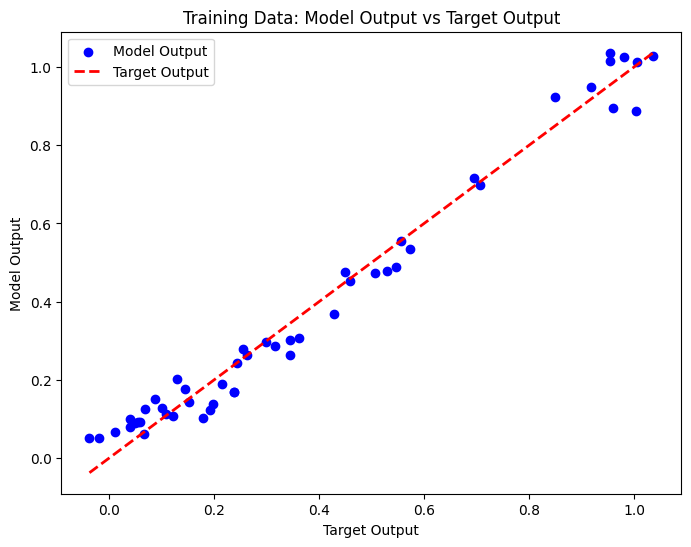

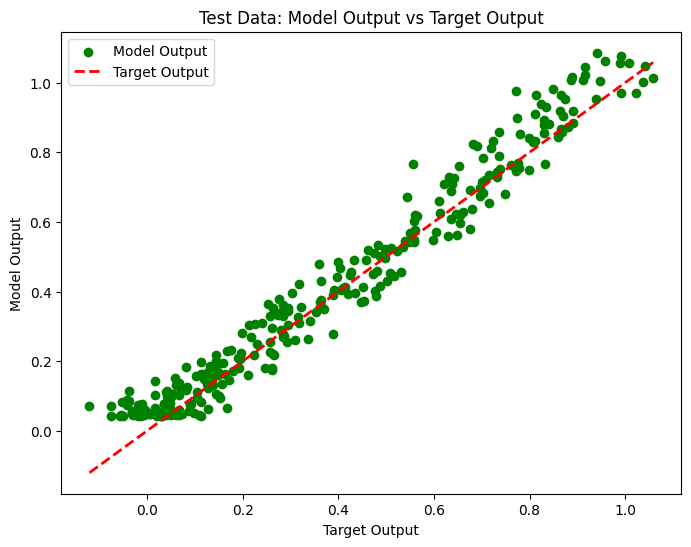

In [19]:
# Define functions for polynomial regression and Ridge regression with regularization

def polynomial_features(X_train, degree):
    X_train_poly = np.ones((X_train.shape[0], 1))
    for d in range(1, degree + 1):
        X_train_poly = np.concatenate((X_train_poly, X_train ** d), axis=1)
    return X_train_poly

def ridge_regression(X_train, y_train, alpha=0.0):
    identity = np.eye(X_train.shape[1])
    weights = np.linalg.inv(X_train.T.dot(X_train) + alpha * identity).dot(X_train.T).dot(y_train)
    return weights

# best_degree and best_alpha are obtained from cross-validation results
best_degree = 2
best_alpha = 1e-10

# Perform polynomial regression with regularization
X_train_poly = polynomial_features(X_train, best_degree)
X_test_poly = polynomial_features(X_test, best_degree)

# Add a column of ones for the bias term
X_train_poly = np.c_[np.ones(X_train_poly.shape[0]), X_train_poly]
X_test_poly = np.c_[np.ones(X_test_poly.shape[0]), X_test_poly]

# Compute weights using Ridge regression with the best alpha
weights = ridge_regression(X_train_poly, y_train, alpha=best_alpha)

# Predictions on training and test data
y_train_pred = X_train_poly.dot(weights)
y_test_pred = X_test_poly.dot(weights)

# Plot model output vs target output for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Model Output')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2, label='Target Output')
plt.xlabel('Target Output')
plt.ylabel('Model Output')
plt.title('Training Data: Model Output vs Target Output')
plt.legend()
plt.show()

# Plot model output vs target output for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Model Output')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Target Output')
plt.xlabel('Target Output')
plt.ylabel('Model Output')
plt.title('Test Data: Model Output vs Target Output')
plt.legend()
plt.show()


#100 Train Data

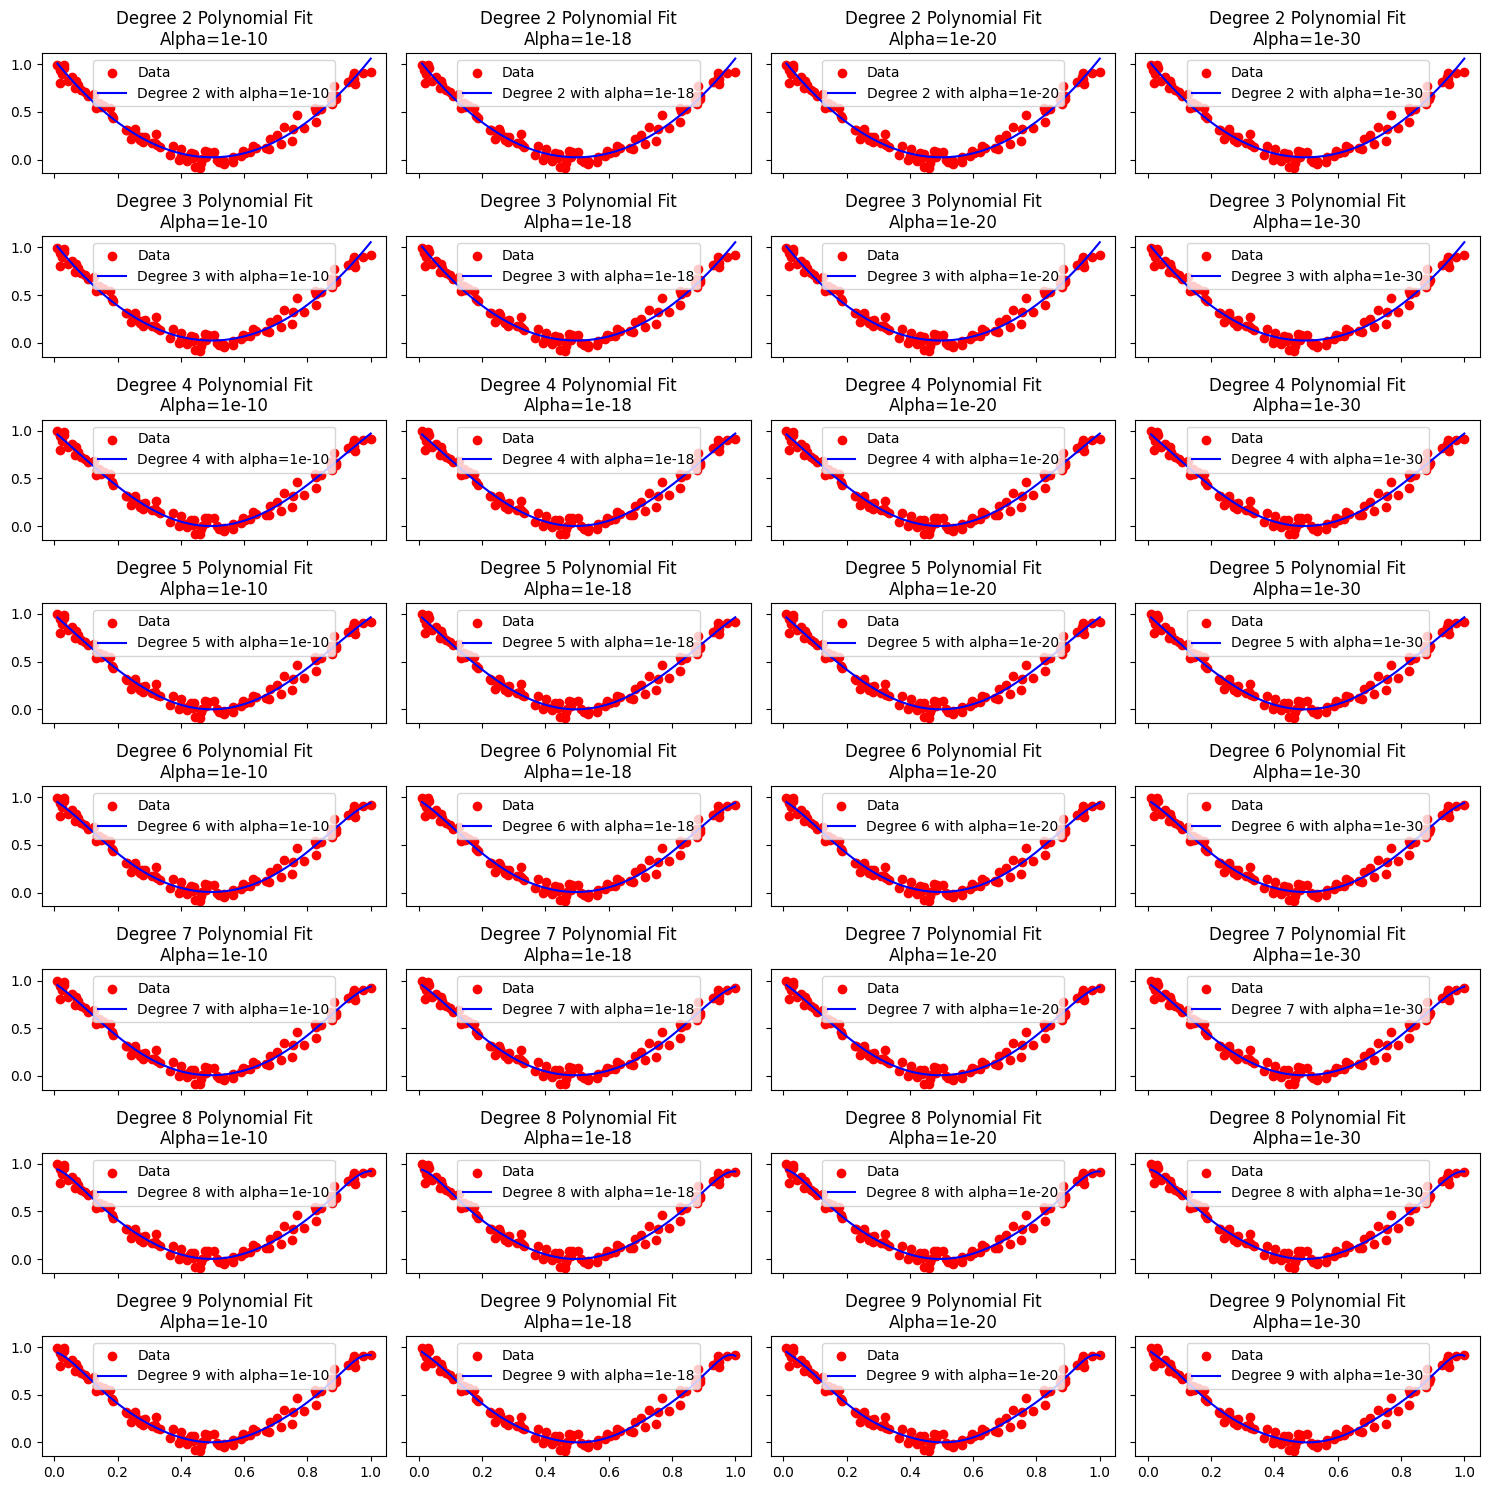

In [20]:
data = pd.read_csv('/content/drive/MyDrive/Group01_Assignment4_code/UnivariateData/train100_1.csv')
X_train = data[['x']]
y_train = data['y']

data = pd.read_csv('/content/drive/MyDrive/Group01_Assignment4_code/UnivariateData/test1.csv')
X_test= data[['x']]
y_test = data['y']

#  Function to perform polynomial regression with regularization (Ridge) from scratch
def polynomial_regression(X_train, y_train, degree, alpha=0.0):
    X_train_poly = np.c_[np.ones(X_train.shape[0]), X_train]
    for d in range(2, degree + 1):
        X_train_poly = np.c_[X_train_poly, X_train ** d]

    # Compute weights using Ridge regression formula (without matrix inversion)
    identity = np.eye(X_train_poly.shape[1])
    weights = np.linalg.inv(X_train_poly.T.dot(X_train_poly) + alpha * identity).dot(X_train_poly.T).dot(y_train)

    return weights

# Function to predict using polynomial regression from scratch
def predict(X_train, weights, degree):
    X_train_poly = np.c_[np.ones(X_train.shape[0]), X_train]
    for d in range(2, degree + 1):
        X_train_poly = np.c_[X_train_poly, X_train ** d]
    return X_train_poly.dot(weights)

# Define the degrees of the polynomial
degrees = np.arange(2, 10)

# Define the values of alpha (regularization parameter)
alphas = [1e-10, 1e-18, 1e-20, 1e-30]

# Create subplots for different degrees of polynomials
fig, axs = plt.subplots(len(degrees), len(alphas), figsize=(15, 15), sharex=True, sharey=True)

for i, degree in enumerate(degrees):
    for j, alpha in enumerate(alphas):
        # Perform polynomial regression to get weights
        weights = polynomial_regression(X_train.values, y_train.values, degree, alpha)

        # Plot the data points
        axs[i, j].scatter(X_train, y_train, color='red', label='Data')

        # Plot the approximated function
        x_range = np.linspace(X_train.min().values, X_train.max().values, 1000)
        y_pred = predict(x_range, weights, degree)
        axs[i, j].plot(x_range, y_pred, color='blue', label=f'Degree {degree} with alpha={alpha}')
        axs[i, j].set_title(f'Degree {degree} Polynomial Fit\nAlpha={alpha}')
        axs[i, j].legend()

plt.tight_layout()
plt.show()


In [21]:
best_degree = None
best_alpha = None
best_mse = float('inf')  # Initialize with a high value
#print('best_mse:',best_mse)

for i, degree in enumerate(degrees):
    for j, alpha in enumerate(alphas):
        # Perform polynomial regression to get weights
        weights = polynomial_regression(X_train.values, y_train.values, degree, alpha)

        # Calculate mean squared error or any other evaluation metric
        y_pred = predict(X_test.values, weights, degree)
        mse = np.mean((y_test - y_pred) ** 2)

        # Check if this model has the lowest MSE
        if mse < best_mse:
            best_mse = mse
            print('best_mse:',best_mse)
            best_degree = degree
            best_alpha = alpha

            # Get the weights before regularization
            X_train_poly = np.c_[np.ones(X_train.shape[0]), X_train]
            for d in range(2, best_degree + 1):
                X_train_poly = np.c_[X_train_poly, X_train.values ** d]
            weights_before_reg = np.linalg.lstsq(X_train_poly, y_train, rcond=None)[0]

            # Set alpha to 0 to turn off regularization and get weights after regularization
            X_poly_reg = np.c_[np.ones(X_train.shape[0]), X_train]
            for d in range(2, best_degree + 1):
                X_poly_reg = np.c_[X_poly_reg, X_train.values ** d]
            weights_after_reg = np.linalg.lstsq(X_poly_reg.T.dot(X_poly_reg) + best_alpha * np.eye(X_poly_reg.shape[1]),
                                                 X_poly_reg.T.dot(y_train), rcond=None)[0]
        print(f'Degree: {degree}, Alpha: {alpha}')
        print(f'Weights before regularization: {weights_before_reg}')
        print(f'Weights after regularization: {weights_after_reg}')
        print('=' * 30)


best_mse: 0.0034496186196450343
Degree: 2, Alpha: 1e-10
Weights before regularization: [ 1.04821554 -4.10835883  4.1187105 ]
Weights after regularization: [ 1.04821554 -4.10835883  4.1187105 ]
Degree: 2, Alpha: 1e-18
Weights before regularization: [ 1.04821554 -4.10835883  4.1187105 ]
Weights after regularization: [ 1.04821554 -4.10835883  4.1187105 ]
Degree: 2, Alpha: 1e-20
Weights before regularization: [ 1.04821554 -4.10835883  4.1187105 ]
Weights after regularization: [ 1.04821554 -4.10835883  4.1187105 ]
Degree: 2, Alpha: 1e-30
Weights before regularization: [ 1.04821554 -4.10835883  4.1187105 ]
Weights after regularization: [ 1.04821554 -4.10835883  4.1187105 ]
Degree: 3, Alpha: 1e-10
Weights before regularization: [ 1.04821554 -4.10835883  4.1187105 ]
Weights after regularization: [ 1.04821554 -4.10835883  4.1187105 ]
Degree: 3, Alpha: 1e-18
Weights before regularization: [ 1.04821554 -4.10835883  4.1187105 ]
Weights after regularization: [ 1.04821554 -4.10835883  4.1187105 ]
De

In [22]:
# Print the best degree, alpha, and corresponding weights before and after regularization
print(f'Best Degree: {best_degree}')
print(f'Best Alpha: {best_alpha}')
print(f'Weights before regularization: {weights_before_reg}')
print(f'Weights after regularization: {weights_after_reg}')
print(f'Best Mean Squared Error: {best_mse}')

Best Degree: 5
Best Alpha: 1e-10
Weights before regularization: [ 0.99348615 -2.94559108 -1.0677197   7.4542666  -2.45537068 -1.01319077]
Weights after regularization: [ 0.99348621 -2.94559306 -1.06770606  7.45423076 -2.45533088 -1.01320652]
Best Mean Squared Error: 0.0031796682546968913


## **MSE**

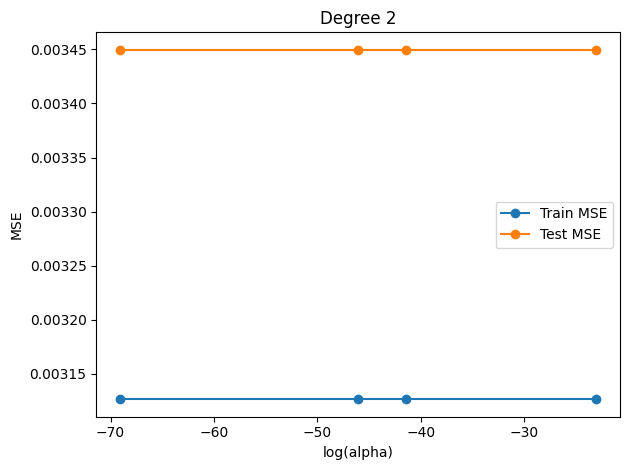

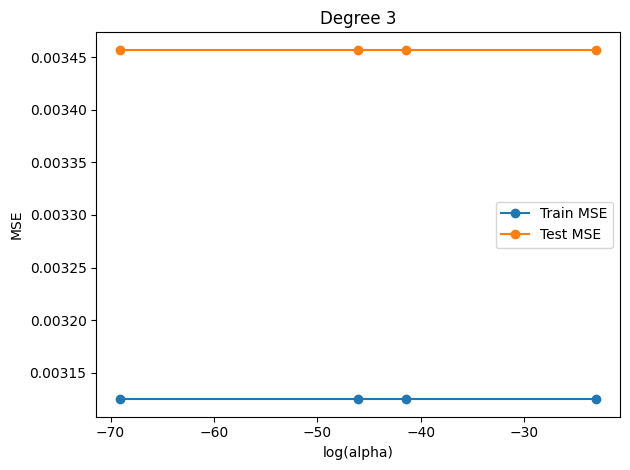

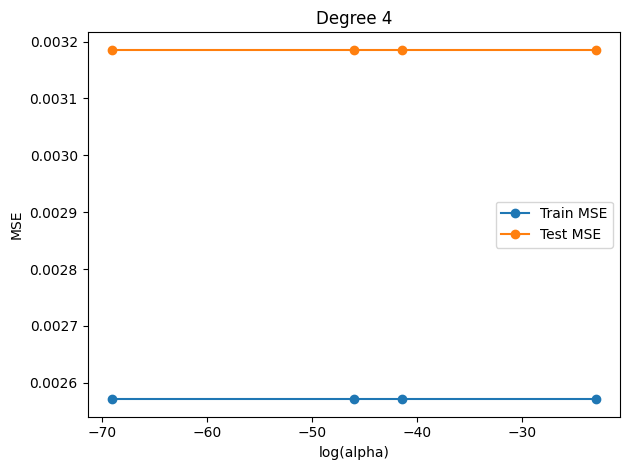

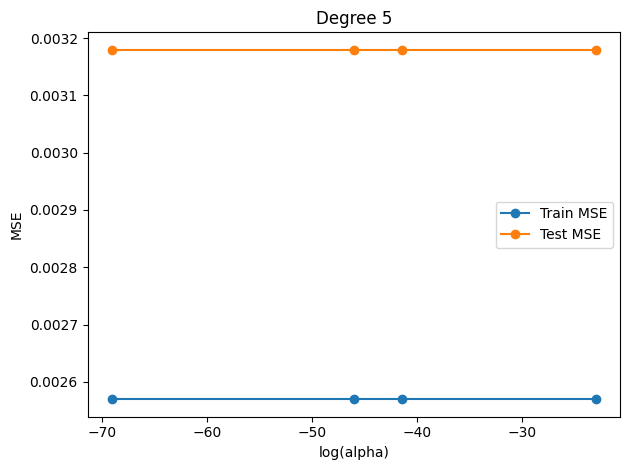

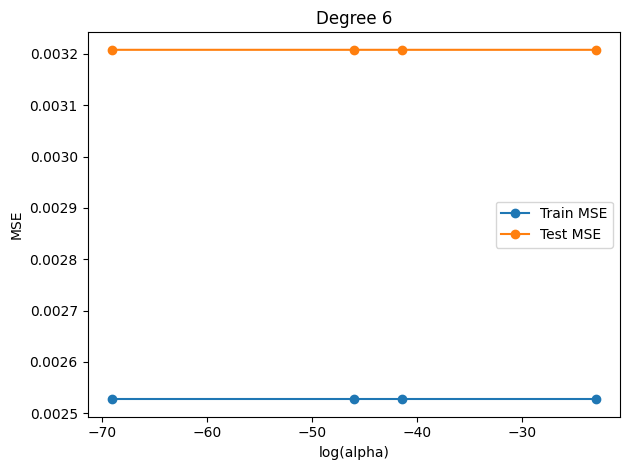

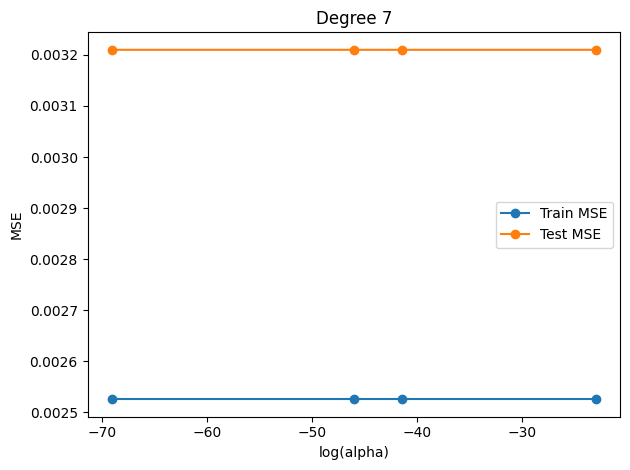

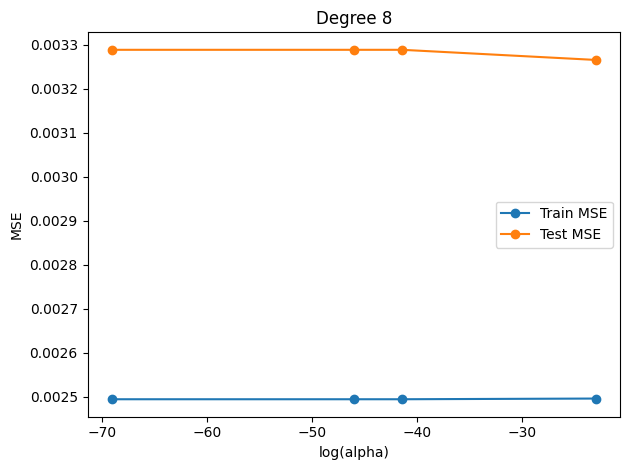

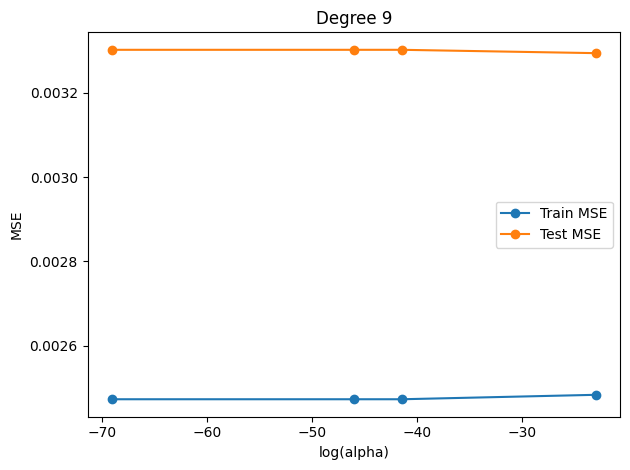

In [23]:
# Initialize arrays to store MSE values
train_mses = np.zeros((len(degrees), len(alphas)))
test_mses = np.zeros((len(degrees), len(alphas)))

# Split data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to perform polynomial regression with regularization (Ridge)
def polynomial_regression(X_train, y_train, degree, alpha=0.0):
    X_train_poly = np.c_[np.ones(X_train.shape[0]), X_train]  # Add a column of ones for the bias term
    for d in range(2, degree + 1):
        X_train_poly = np.c_[X_train_poly, X_train ** d]  # Add polynomial features up to the specified degree

    # Compute weights using Ridge regression formula (without matrix inversion)
    identity = np.eye(X_train_poly.shape[1])
    weights = np.linalg.inv(X_train_poly.T.dot(X_train_poly) + alpha * identity).dot(X_train_poly.T).dot(y_train)

    return weights

# Function to predict using polynomial regression
def predict(X_train, weights):
    X_train_poly = np.c_[np.ones(X_train.shape[0]), X_train]  # Add a column of ones for the bias term
    for d in range(2, len(weights)):
        X_train_poly = np.c_[X_train_poly, X_train ** d]  # Add polynomial features up to the specified degree
    return X_train_poly.dot(weights)


# Iterate over degrees and alphas and calculate MSE for each combination
for i, degree in enumerate(degrees):
    for j, alpha in enumerate(alphas):
        # Perform polynomial regression to get weights
        weights = polynomial_regression(X_train.values, y_train.values, degree, alpha)

        # Predict on training and test data
        y_train_pred = predict(X_train.values, weights)
        y_test_pred = predict(X_test.values, weights)

        # Calculate MSE for training and test data
        train_mse = np.mean((y_train - y_train_pred) ** 2)
        test_mse = np.mean((y_test - y_test_pred) ** 2)

        # Store MSE values
        train_mses[i, j] = train_mse
        test_mses[i, j] = test_mse

# Plot MSE values
#fig, axs = plt.subplots(len(degrees), 1, figsize=(8, 6), sharex=True)

for i, degree in enumerate(degrees):
    plt.plot(np.log(alphas), train_mses[i, :], label='Train MSE', marker='o')
    plt.plot(np.log(alphas), test_mses[i, :], label='Test MSE', marker='o')
    plt.title(f'Degree {degree}')
    plt.ylabel('MSE')
    plt.legend()

    plt.xlabel('log(alpha)')
    plt.tight_layout()
    plt.show()

## **Model output vs Target output**

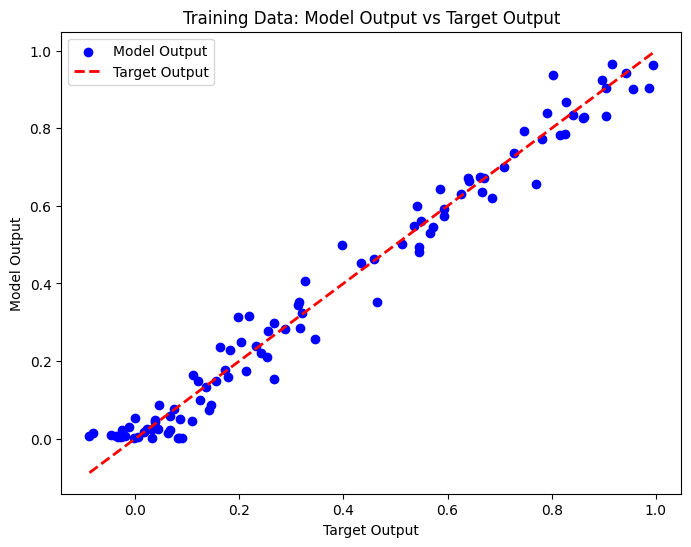

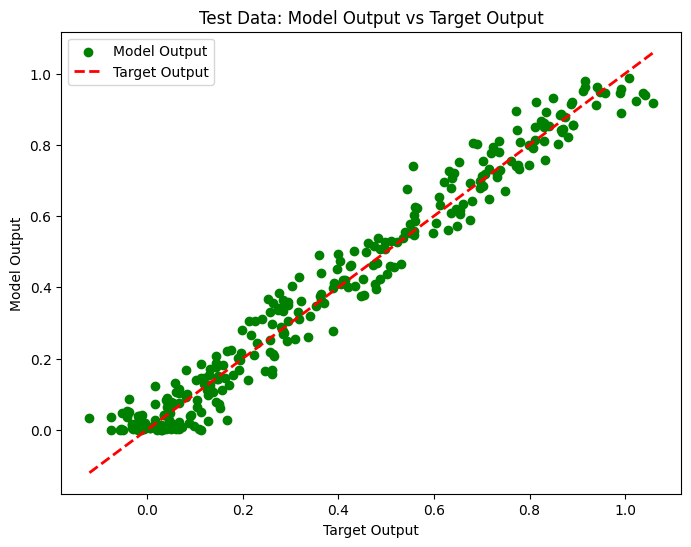

In [24]:
# Define functions for polynomial regression and Ridge regression with regularization

def polynomial_features(X_train, degree):
    X_train_poly = np.ones((X_train.shape[0], 1))
    for d in range(1, degree + 1):
        X_train_poly = np.concatenate((X_train_poly, X_train ** d), axis=1)
    return X_train_poly

def ridge_regression(X_train, y_train, alpha=0.0):
    identity = np.eye(X_train.shape[1])
    weights = np.linalg.inv(X_train.T.dot(X_train) + alpha * identity).dot(X_train.T).dot(y_train)
    return weights

# best_degree and best_alpha are obtained from cross-validation results
#best_degree =
#best_alpha = 0.1

# Perform polynomial regression with regularization
X_train_poly = polynomial_features(X_train, best_degree)
X_test_poly = polynomial_features(X_test, best_degree)

# Add a column of ones for the bias term
X_train_poly = np.c_[np.ones(X_train_poly.shape[0]), X_train_poly]
X_test_poly = np.c_[np.ones(X_test_poly.shape[0]), X_test_poly]

# Compute weights using Ridge regression with the best alpha
weights = ridge_regression(X_train_poly, y_train, alpha=best_alpha)

# Predictions on training and test data
y_train_pred = X_train_poly.dot(weights)
y_test_pred = X_test_poly.dot(weights)

# Plot model output vs target output for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Model Output')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2, label='Target Output')
plt.xlabel('Target Output')
plt.ylabel('Model Output')
plt.title('Training Data: Model Output vs Target Output')
plt.legend()
plt.show()

# Plot model output vs target output for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Model Output')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Target Output')
plt.xlabel('Target Output')
plt.ylabel('Model Output')
plt.title('Test Data: Model Output vs Target Output')
plt.legend()
plt.show()


#Complete Data

In [28]:
# Load data from CSV
data = pd.read_csv('/content/drive/MyDrive/Group01_Assignment4_code/UnivariateData/1.csv')
X = data[['x']]
y = data['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to perform polynomial regression with regularization (Ridge) from scratch
def polynomial_regression(X, y, degree, alpha=0.0):
    X_poly = np.c_[np.ones(X.shape[0]), X]
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X ** d]

    # Compute weights using Ridge regression formula (without matrix inversion)
    identity = np.eye(X_poly.shape[1])
    weights = np.linalg.inv(X_poly.T.dot(X_poly) + alpha * identity).dot(X_poly.T).dot(y)

    return weights

# Function to predict using polynomial regression from scratch
def predict(X, weights, degree):
    X_poly = np.c_[np.ones(X.shape[0]), X]
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X ** d]
    return X_poly.dot(weights)

# Define the degrees of the polynomial
degrees = np.arange(2, 10)

# Define the values of alpha (regularization parameter)
alphas = [1e-10, 1e-18, 1e-20, 1e-30]

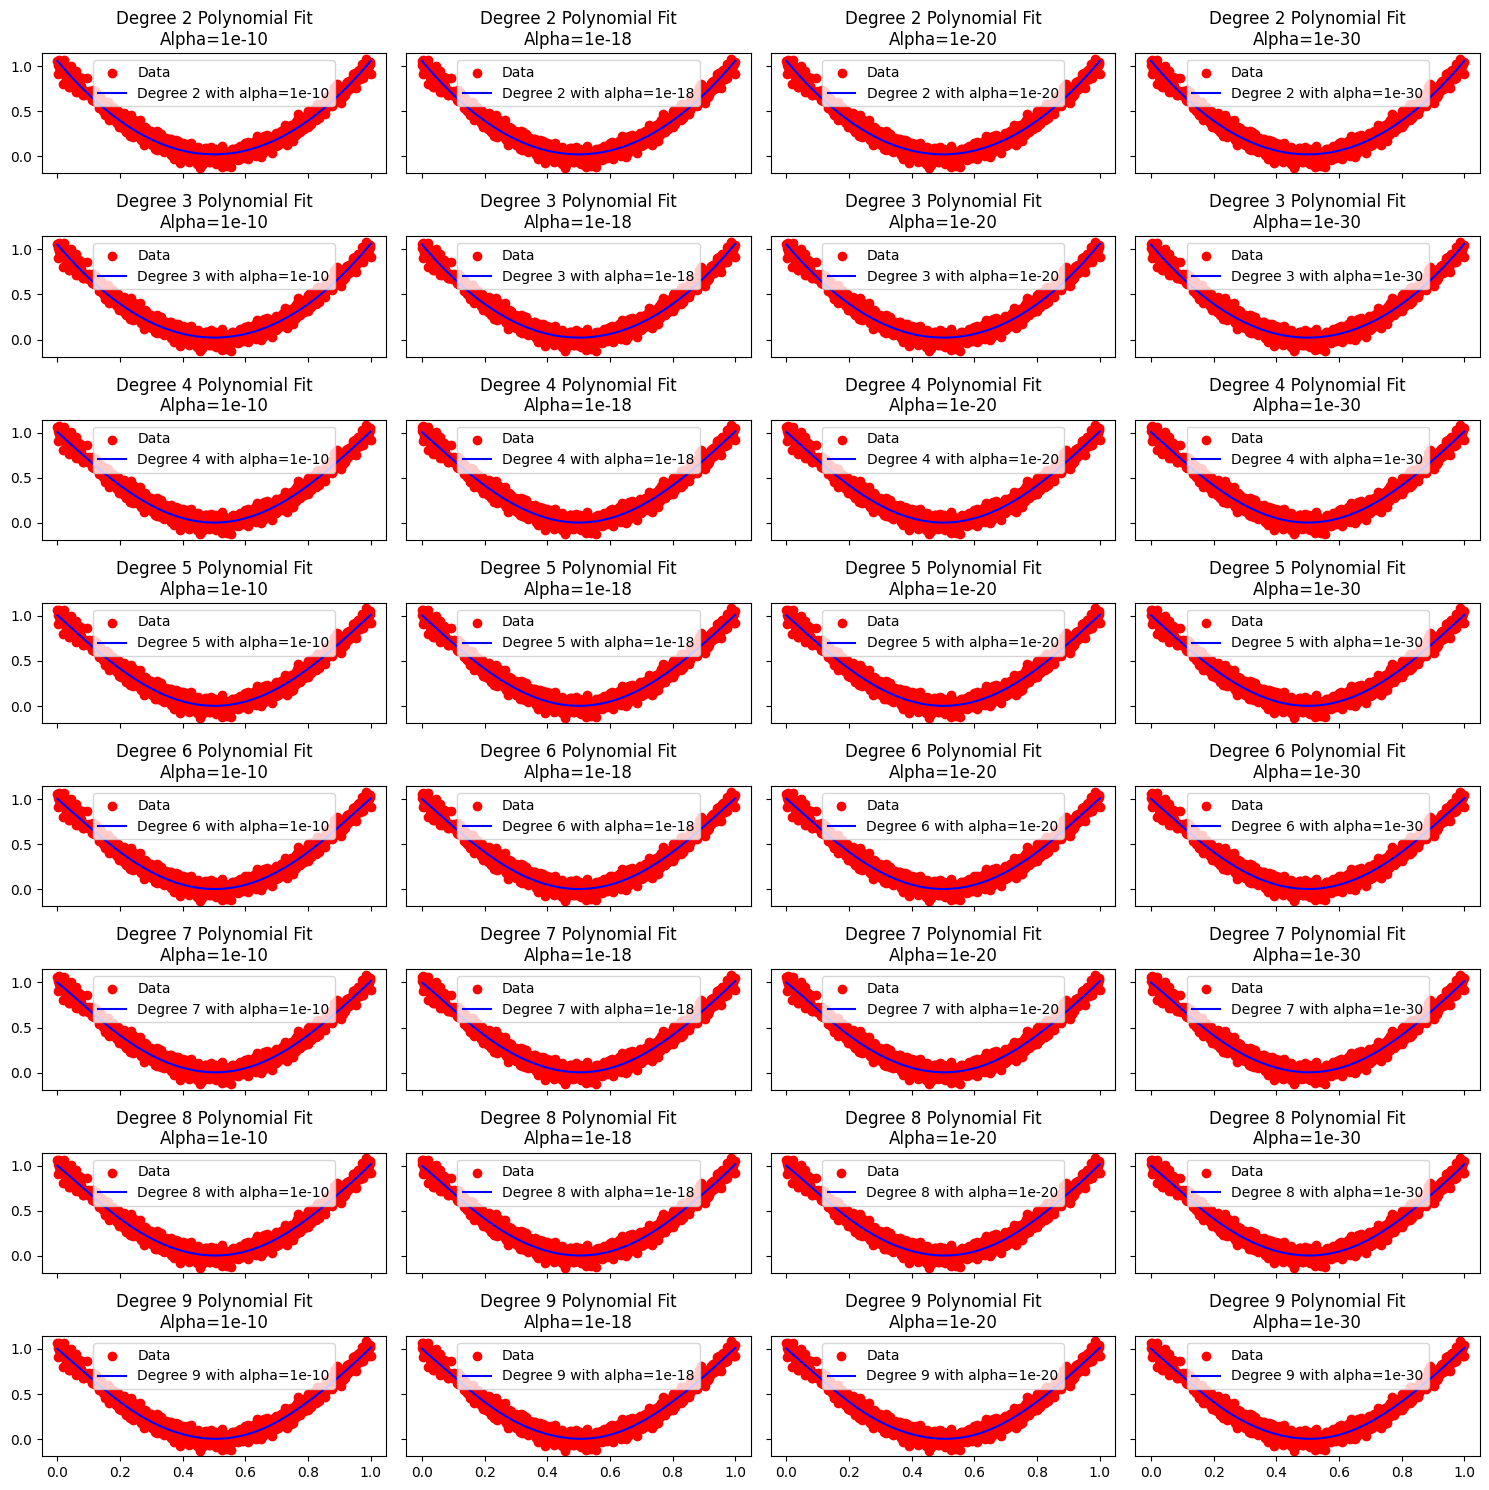

In [29]:
# Create subplots for different degrees of polynomials
fig, axs = plt.subplots(len(degrees), len(alphas), figsize=(15, 15), sharex=True, sharey=True)

for i, degree in enumerate(degrees):
    for j, alpha in enumerate(alphas):
        # Perform polynomial regression to get weights
        weights = polynomial_regression(X_train.values, y_train.values, degree, alpha)

        # Plot the data points
        axs[i, j].scatter(X_train, y_train, color='red', label='Data')

        # Plot the approximated function
        x_range = np.linspace(X.min().values, X.max().values, 1000)
        y_pred = predict(x_range, weights, degree)
        axs[i, j].plot(x_range, y_pred, color='blue', label=f'Degree {degree} with alpha={alpha}')
        axs[i, j].set_title(f'Degree {degree} Polynomial Fit\nAlpha={alpha}')
        axs[i, j].legend()

plt.tight_layout()
plt.show()


In [30]:
best_degree = None
best_alpha = None
best_mse = float('inf')  # Initialize with a high value

for i, degree in enumerate(degrees):
    for j, alpha in enumerate(alphas):
        # Perform polynomial regression to get weights
        weights = polynomial_regression(X_train.values, y_train.values, degree, alpha)

        # Calculate mean squared error or any other evaluation metric
        y_pred = predict(X_test.values, weights, degree)
        mse = np.mean((y_test - y_pred) ** 2)

        # Check if this model has the lowest MSE
        if mse < best_mse:
            best_mse = mse
            print('best_mse:',best_mse)
            best_degree = degree
            best_alpha = alpha

            # Get the weights before regularization
            X_train_poly = np.c_[np.ones(X_train.shape[0]), X_train]
            for d in range(2, best_degree + 1):
                X_train_poly = np.c_[X_train_poly, X_train.values ** d]
            weights_before_reg = np.linalg.lstsq(X_train_poly, y_train, rcond=None)[0]

            # Set alpha to 0 to turn off regularization and get weights after regularization
            X_poly_reg = np.c_[np.ones(X_train.shape[0]), X_train]
            for d in range(2, best_degree + 1):
                X_poly_reg = np.c_[X_poly_reg, X_train.values ** d]
            weights_after_reg = np.linalg.lstsq(X_poly_reg.T.dot(X_poly_reg) + best_alpha * np.eye(X_poly_reg.shape[1]),
                                                 X_poly_reg.T.dot(y_train), rcond=None)[0]
        print(f'Degree: {degree}, Alpha: {alpha}')
        print(f'Weights before regularization: {weights_before_reg}')
        print(f'Weights after regularization: {weights_after_reg}')
        print('=' * 30)



best_mse: 0.0034666197518754683
Degree: 2, Alpha: 1e-10
Weights before regularization: [ 1.0566879  -4.14137355  4.14338399]
Weights after regularization: [ 1.0566879  -4.14137355  4.14338399]
Degree: 2, Alpha: 1e-18
Weights before regularization: [ 1.0566879  -4.14137355  4.14338399]
Weights after regularization: [ 1.0566879  -4.14137355  4.14338399]
Degree: 2, Alpha: 1e-20
Weights before regularization: [ 1.0566879  -4.14137355  4.14338399]
Weights after regularization: [ 1.0566879  -4.14137355  4.14338399]
Degree: 2, Alpha: 1e-30
Weights before regularization: [ 1.0566879  -4.14137355  4.14338399]
Weights after regularization: [ 1.0566879  -4.14137355  4.14338399]
best_mse: 0.0034616946036531066
Degree: 3, Alpha: 1e-10
Weights before regularization: [ 1.05312825 -4.09893888  4.03725874  0.07084254]
Weights after regularization: [ 1.05312825 -4.09893888  4.03725874  0.07084255]
Degree: 3, Alpha: 1e-18
Weights before regularization: [ 1.05312825 -4.09893888  4.03725874  0.07084254]
We

#Best Degree, Alpha, MSE

In [31]:
# Print the best degree, alpha, and corresponding weights before and after regularization
print(f'Best Degree: {best_degree}')
print(f'Best Alpha: {best_alpha}')
print(f'Weights before regularization: {weights_before_reg}')
print(f'Weights after regularization: {weights_after_reg}')
print(f'Best Mean Squared Error: {best_mse}')

Best Degree: 8
Best Alpha: 1e-18
Weights before regularization: [  0.99905095  -2.82541141  -3.55813492  18.4902874  -12.05802975
 -38.87411846  98.12136675 -86.1135586   26.83540577]
Weights after regularization: [  0.99905093  -2.82541007  -3.55815812  18.49045595 -12.05865587
 -38.87282735  98.11987209 -86.11264979  26.83517995]
Best Mean Squared Error: 0.0031058971700144043


#MSE

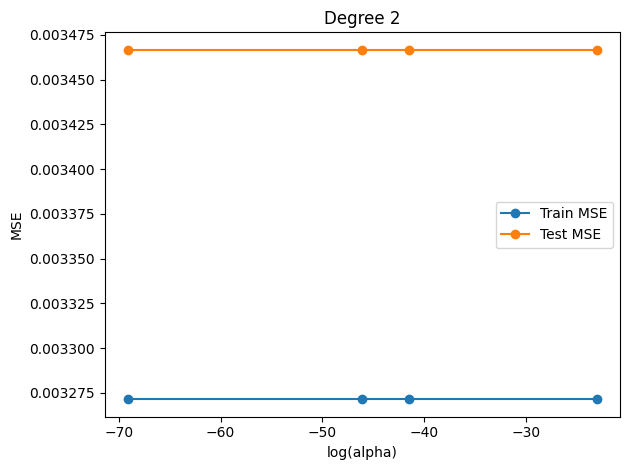

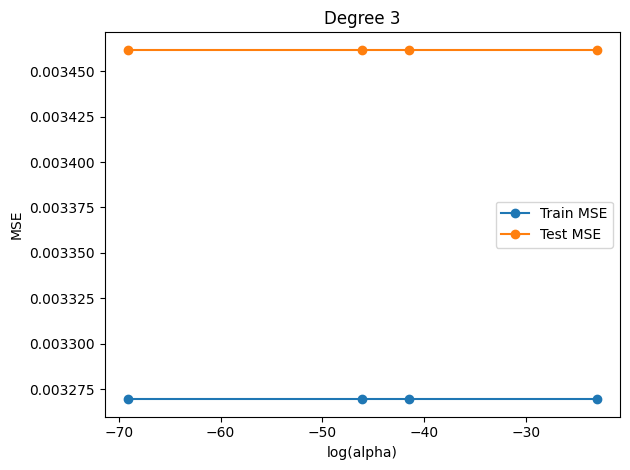

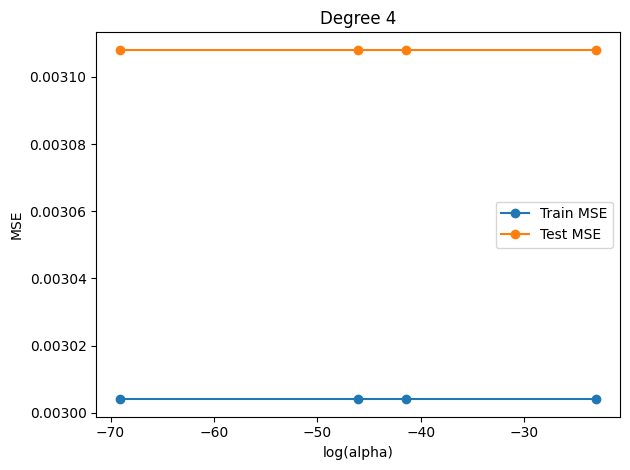

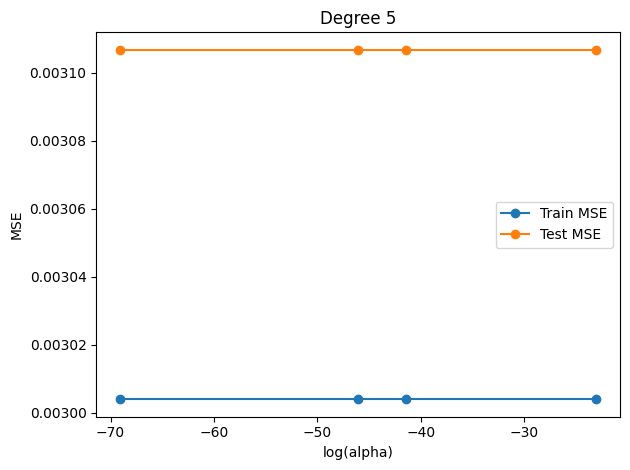

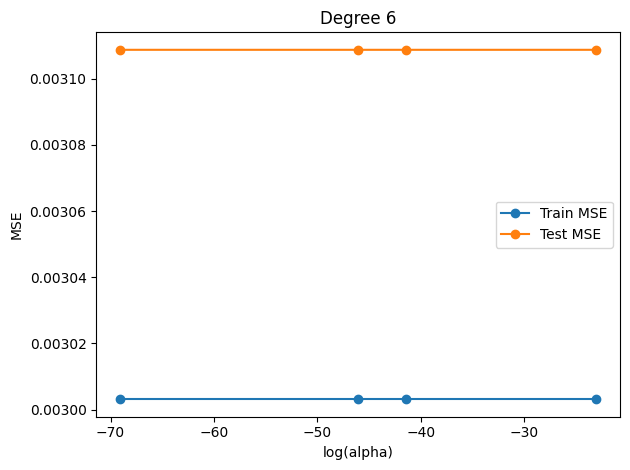

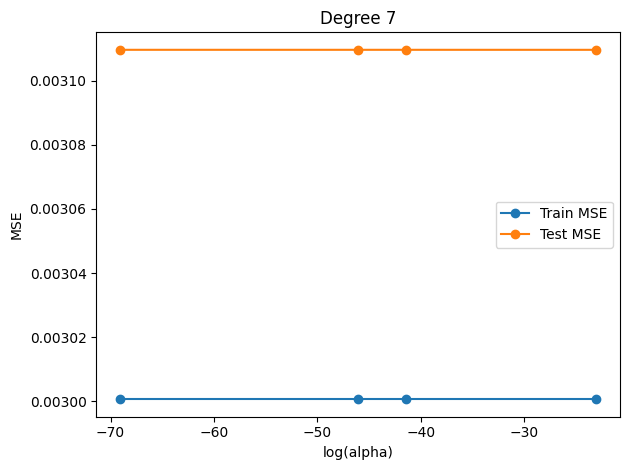

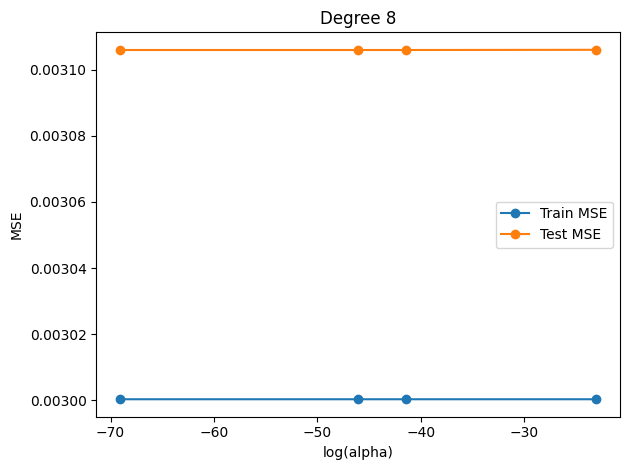

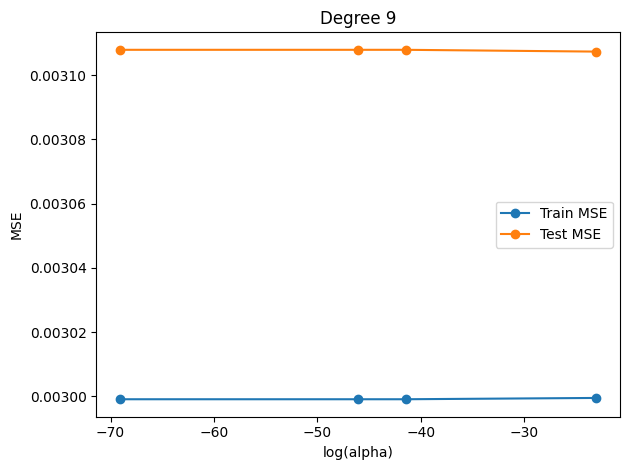

In [32]:
# Initialize arrays to store MSE values
train_mses = np.zeros((len(degrees), len(alphas)))
test_mses = np.zeros((len(degrees), len(alphas)))

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to perform polynomial regression with regularization (Ridge)
def polynomial_regression(X, y, degree, alpha=0.0):
    X_poly = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the bias term
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X ** d]  # Add polynomial features up to the specified degree

    # Compute weights using Ridge regression formula (without matrix inversion)
    identity = np.eye(X_poly.shape[1])
    weights = np.linalg.inv(X_poly.T.dot(X_poly) + alpha * identity).dot(X_poly.T).dot(y)

    return weights

# Function to predict using polynomial regression
def predict(X, weights):
    X_poly = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the bias term
    for d in range(2, len(weights)):
        X_poly = np.c_[X_poly, X ** d]  # Add polynomial features up to the specified degree
    return X_poly.dot(weights)

# Iterate over degrees and alphas and calculate MSE for each combination
for i, degree in enumerate(degrees):
    for j, alpha in enumerate(alphas):
        # Perform polynomial regression to get weights
        weights = polynomial_regression(X_train.values, y_train.values, degree, alpha)

        # Predict on training and test data
        y_train_pred = predict(X_train.values, weights)
        y_test_pred = predict(X_test.values, weights)

        # Calculate MSE for training and test data
        train_mse = np.mean((y_train - y_train_pred) ** 2)
        test_mse = np.mean((y_test - y_test_pred) ** 2)

        # Store MSE values
        train_mses[i, j] = train_mse
        test_mses[i, j] = test_mse

# Plot MSE values
#fig, axs = plt.subplots(len(degrees), 1, figsize=(8, 6), sharex=True)

for i, degree in enumerate(degrees):
    plt.plot(np.log(alphas), train_mses[i, :], label='Train MSE', marker='o')
    plt.plot(np.log(alphas), test_mses[i, :], label='Test MSE', marker='o')
    plt.title(f'Degree {degree}')
    plt.ylabel('MSE')
    plt.legend()

    plt.xlabel('log(alpha)')
    plt.tight_layout()
    plt.show()

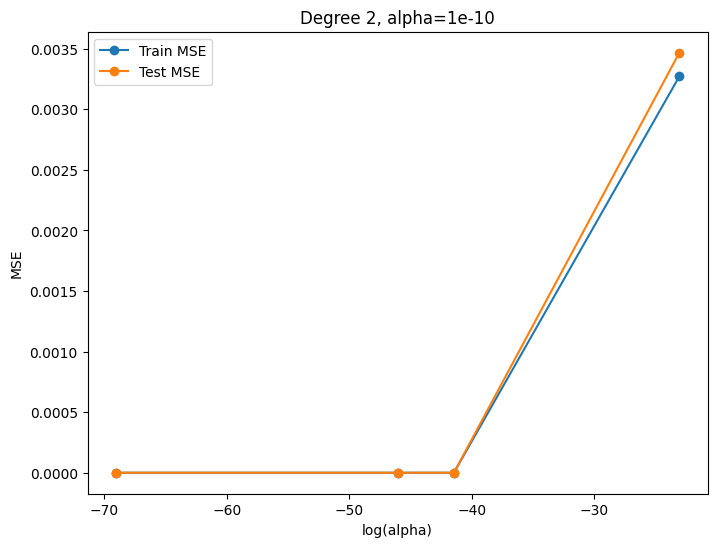

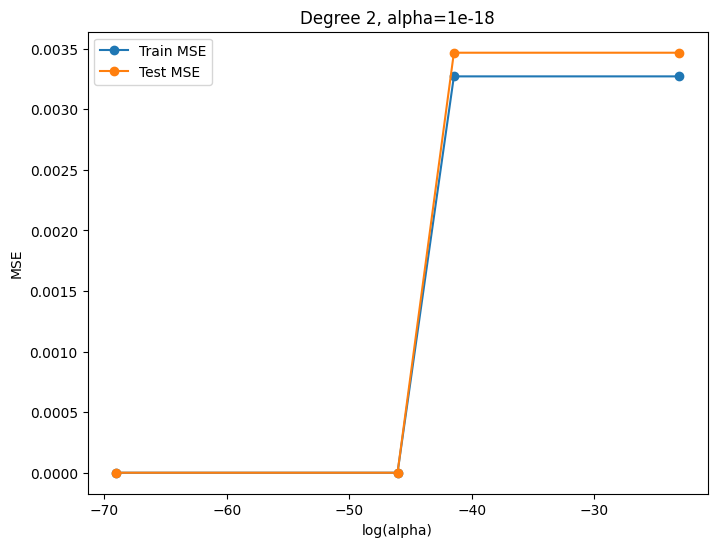

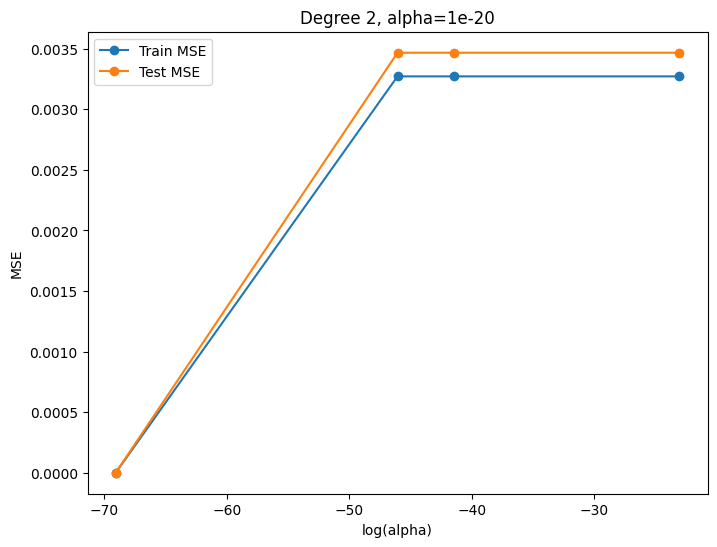

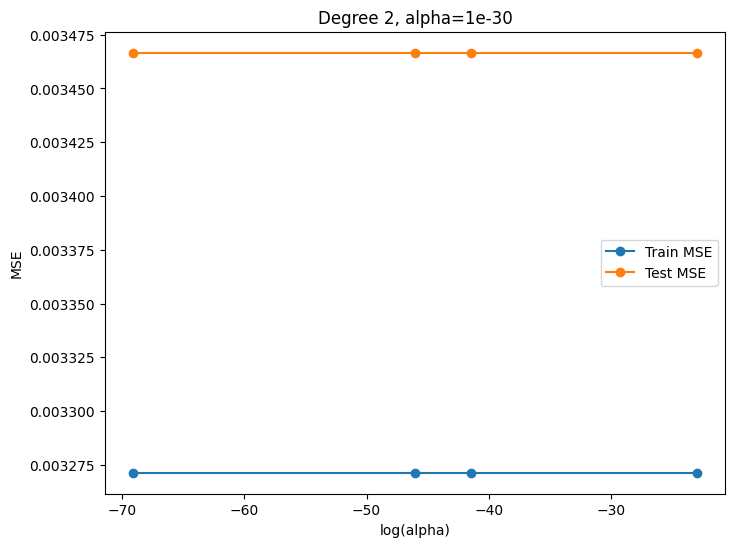

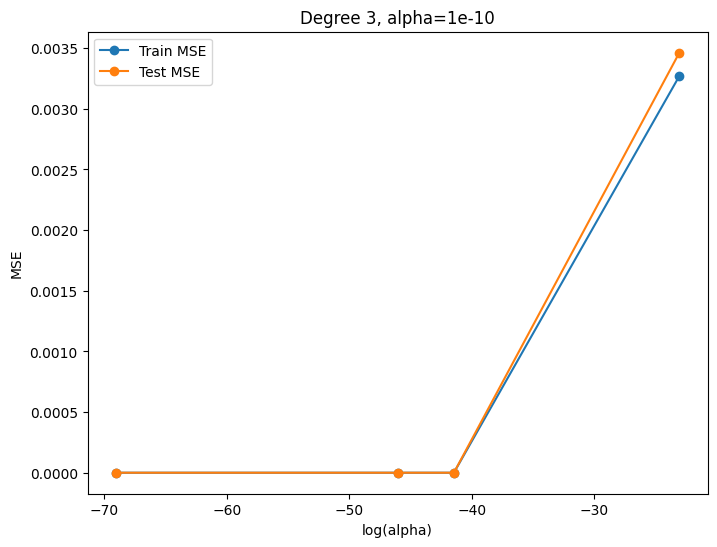

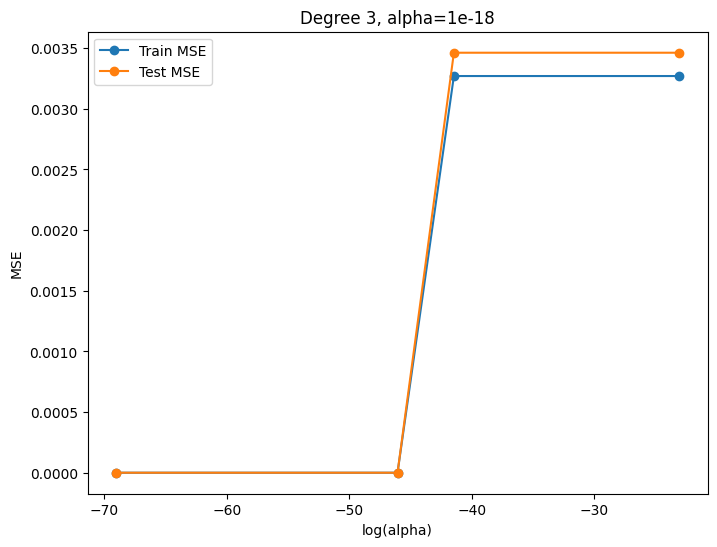

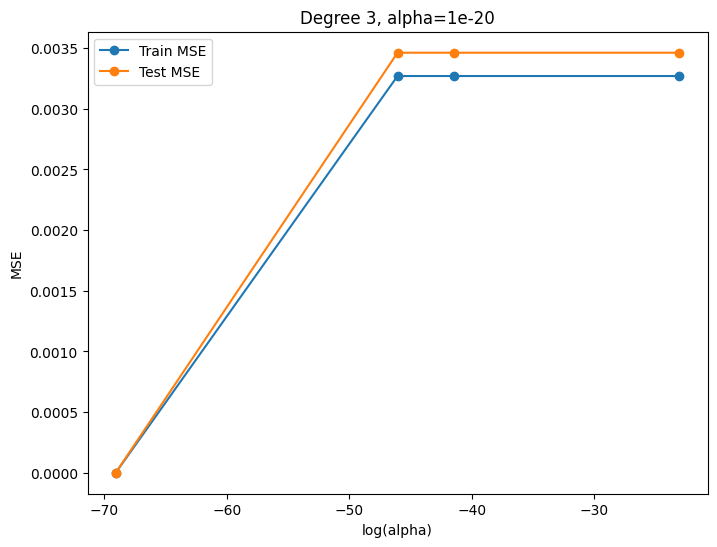

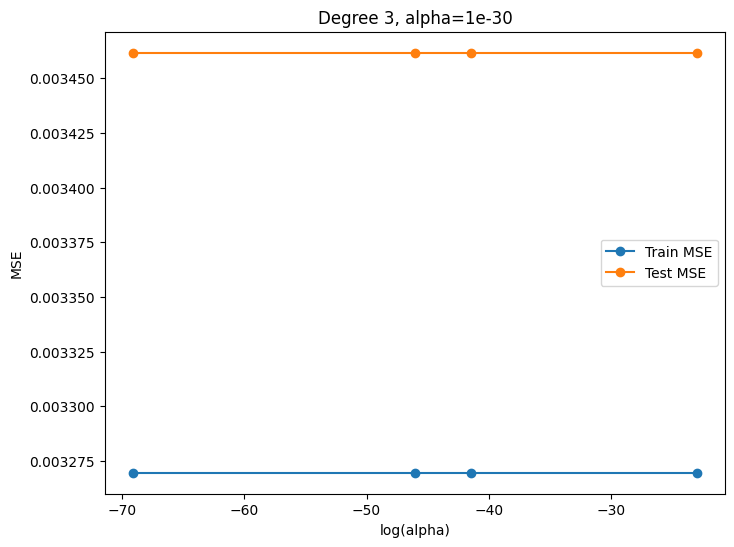

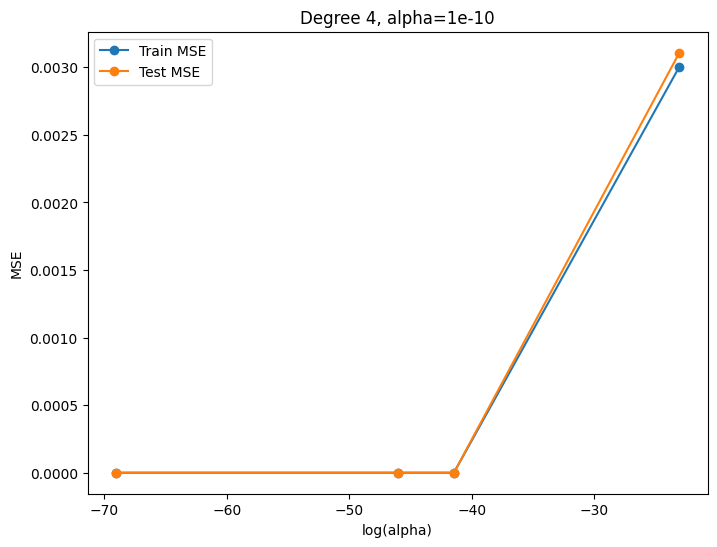

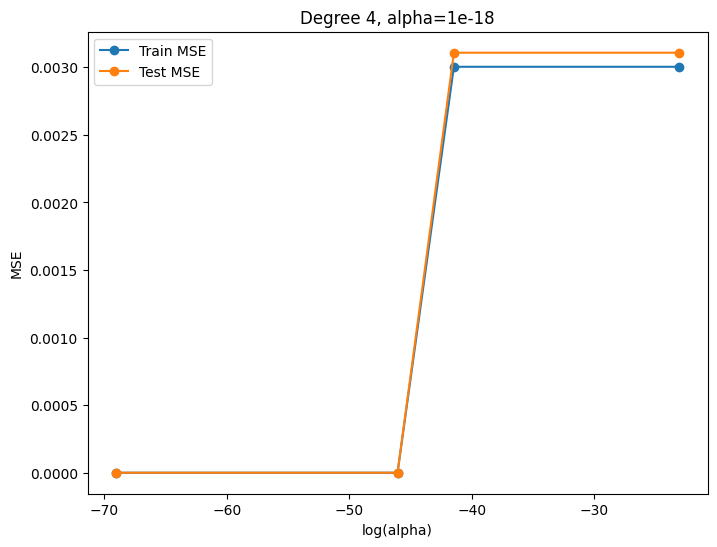

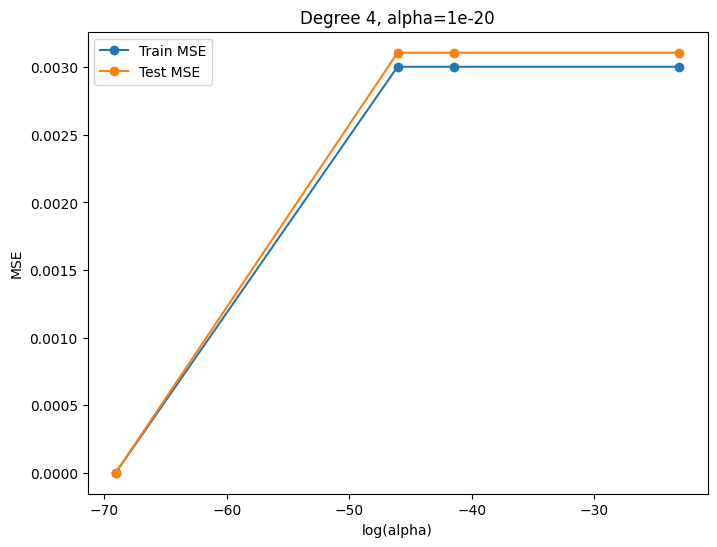

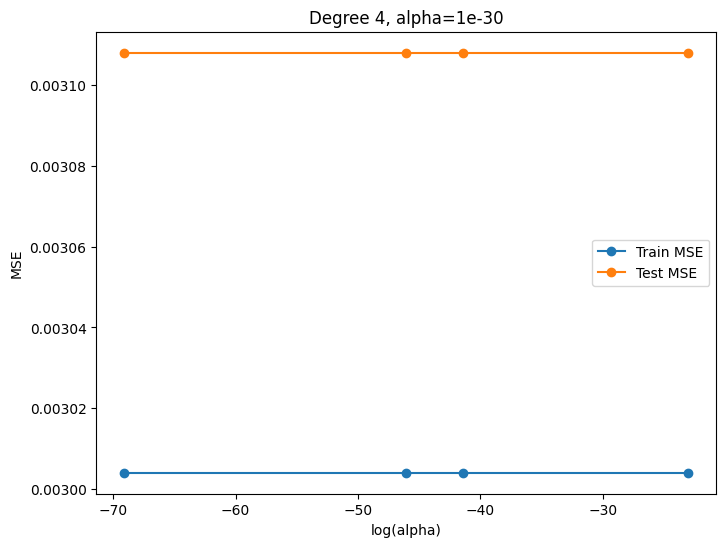

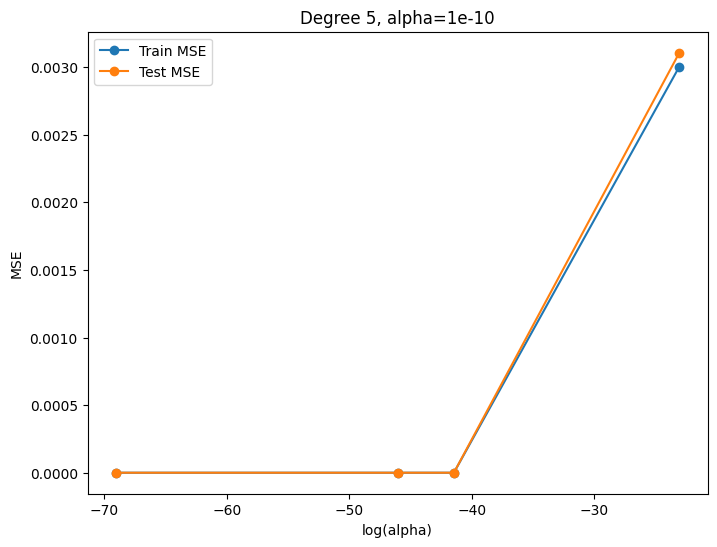

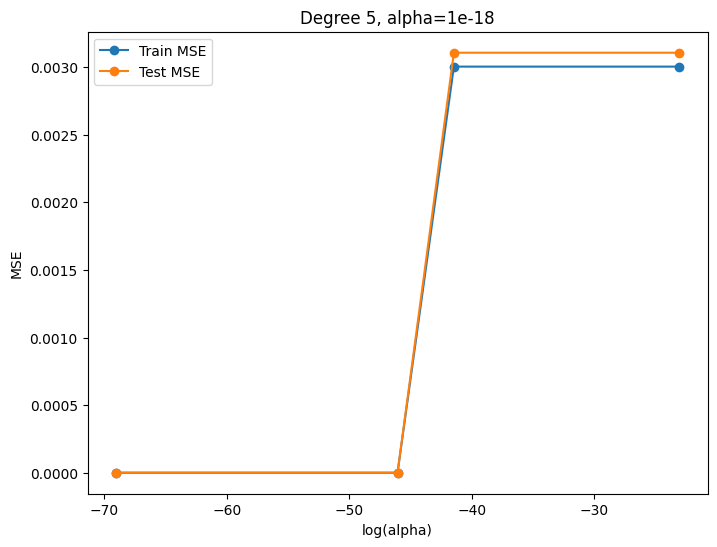

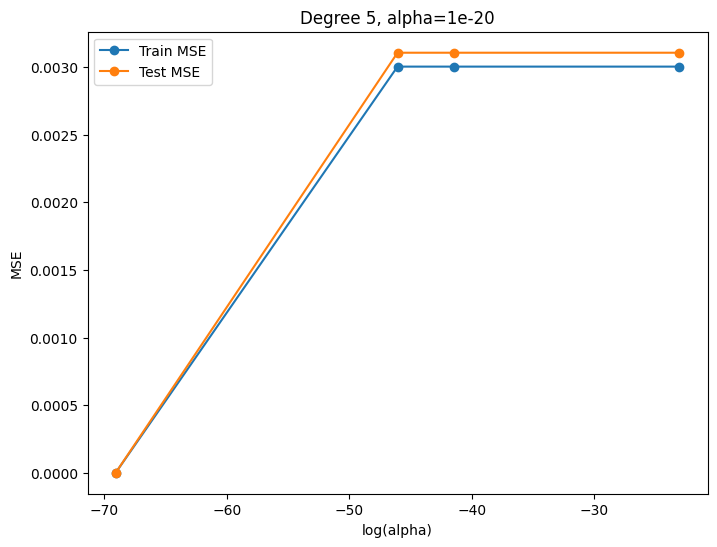

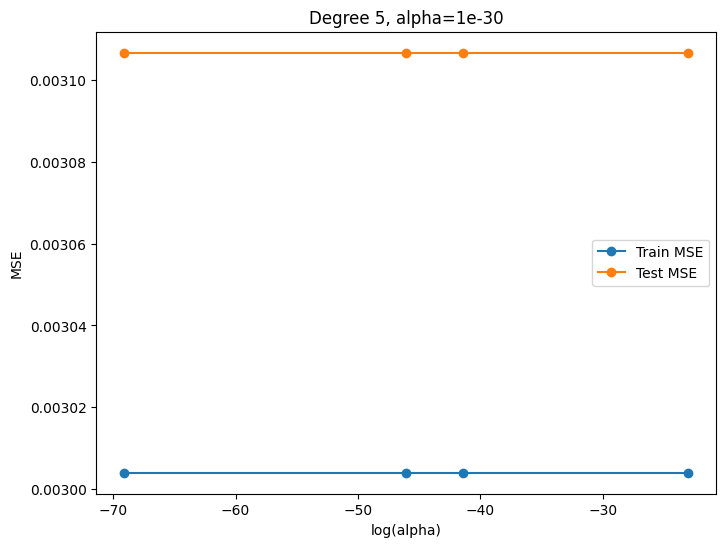

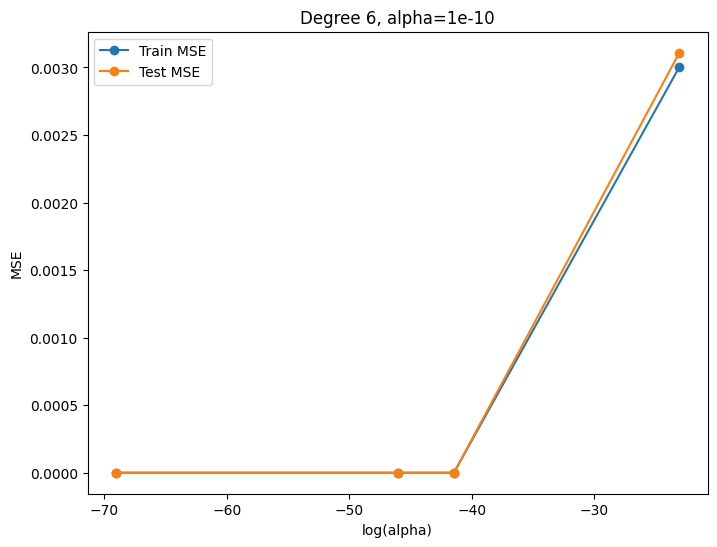

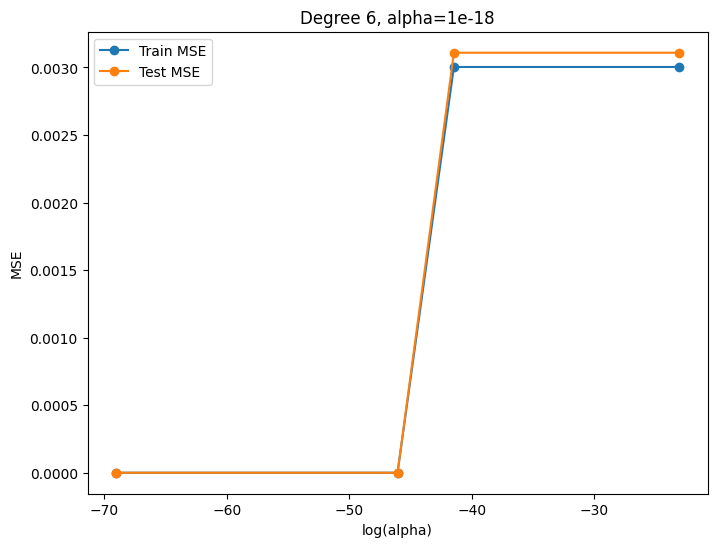

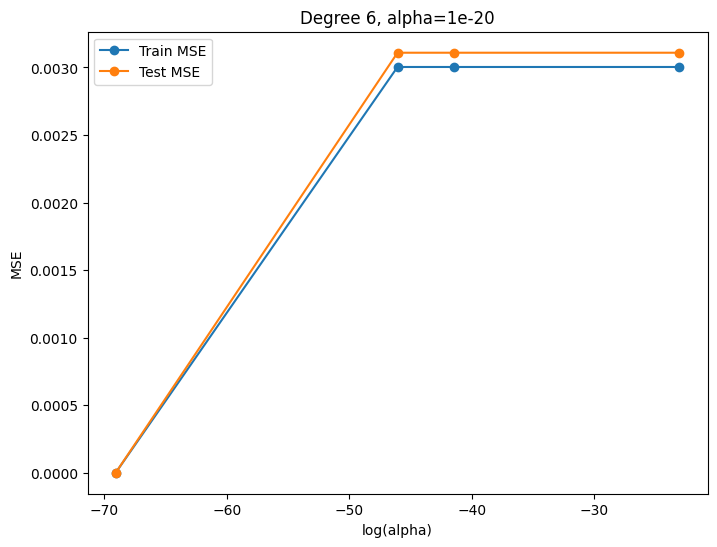

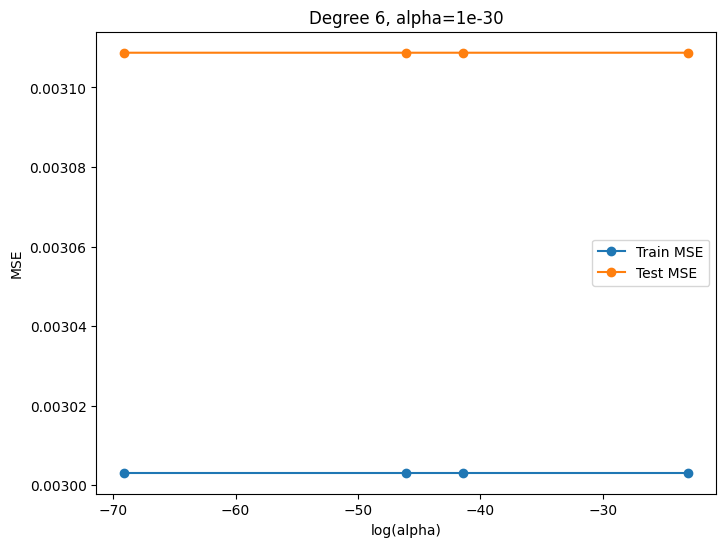

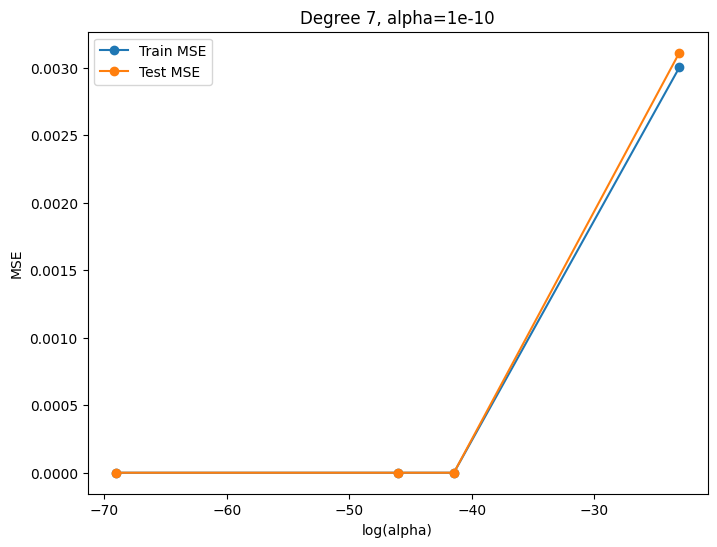

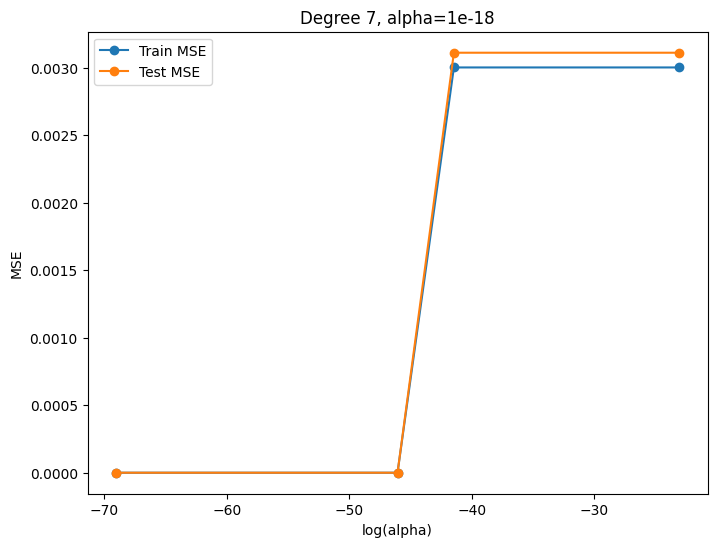

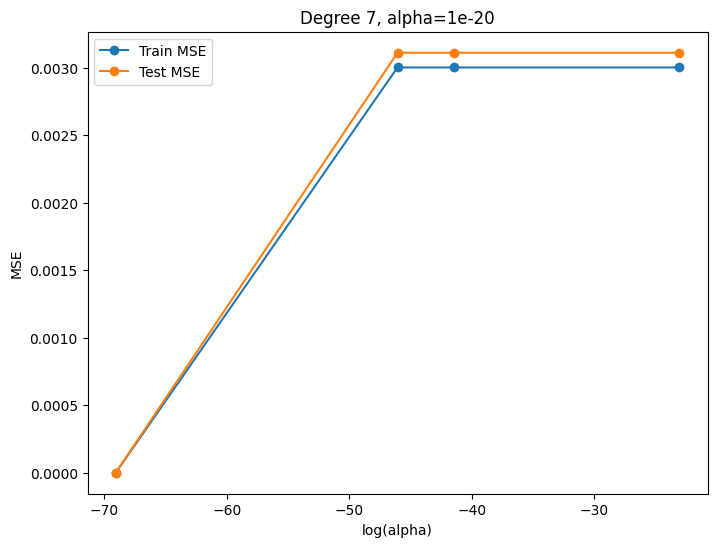

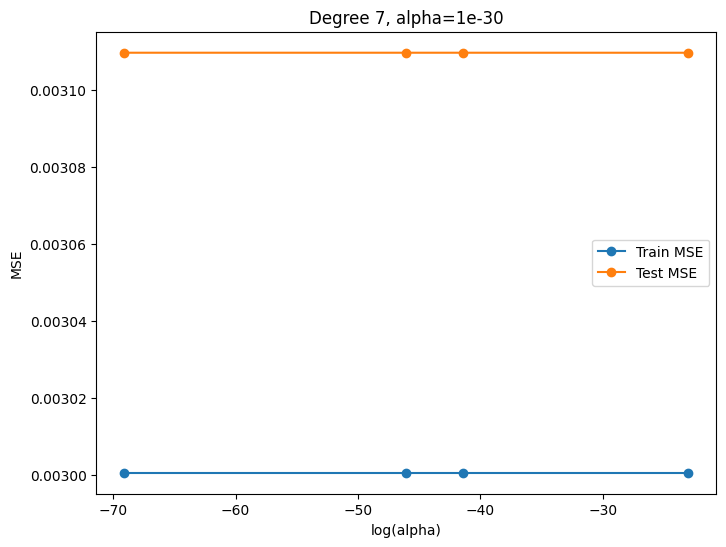

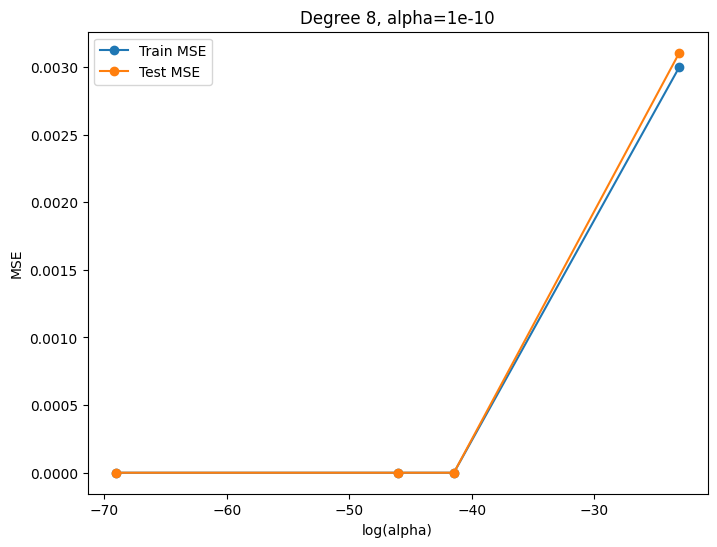

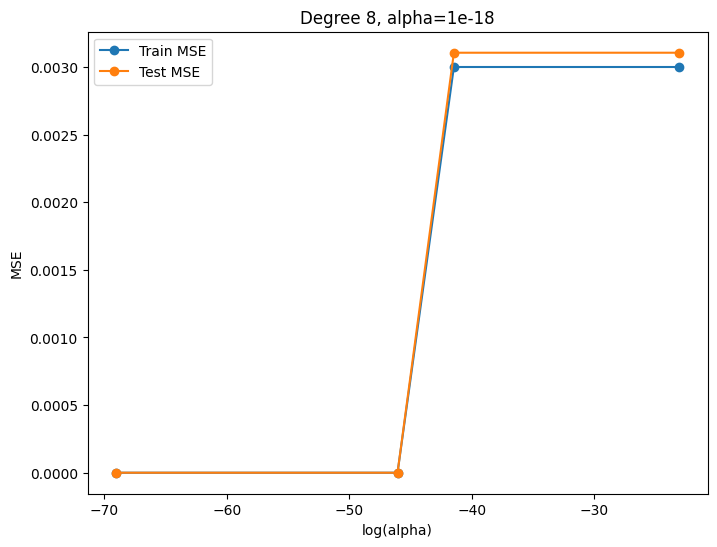

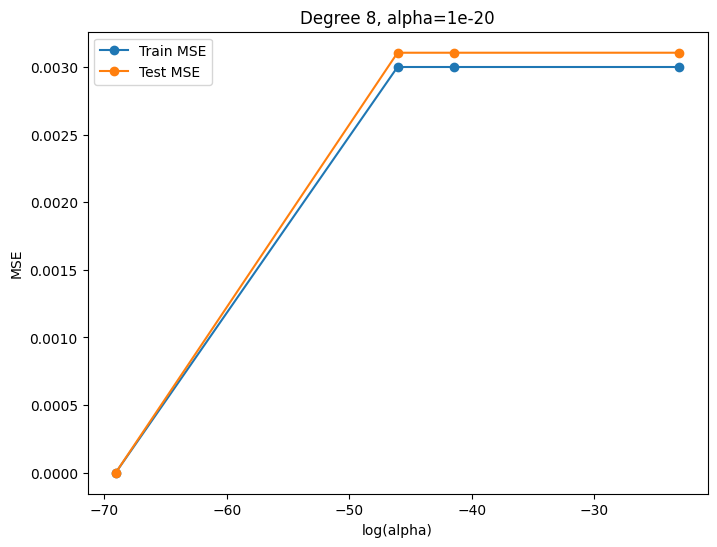

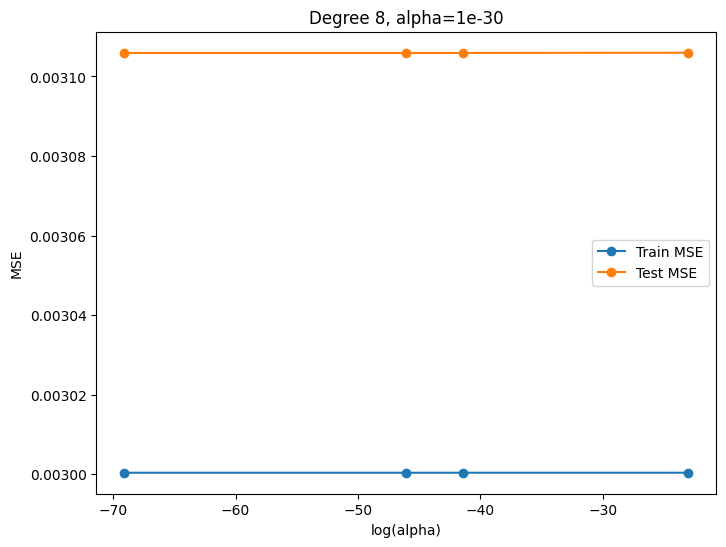

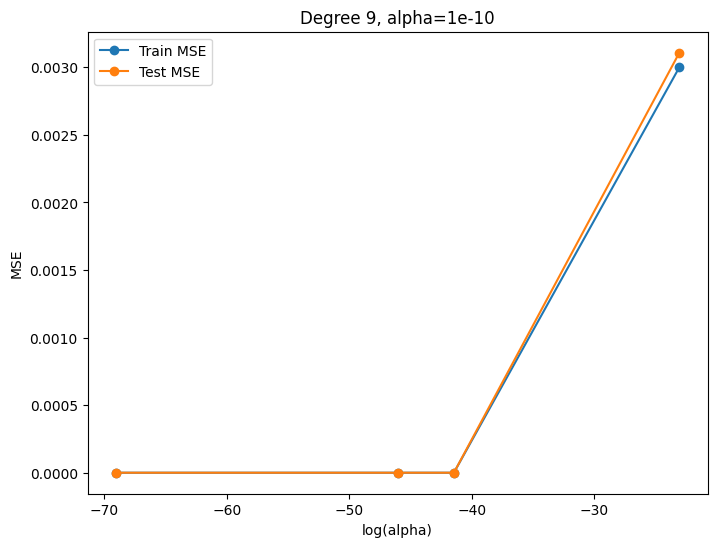

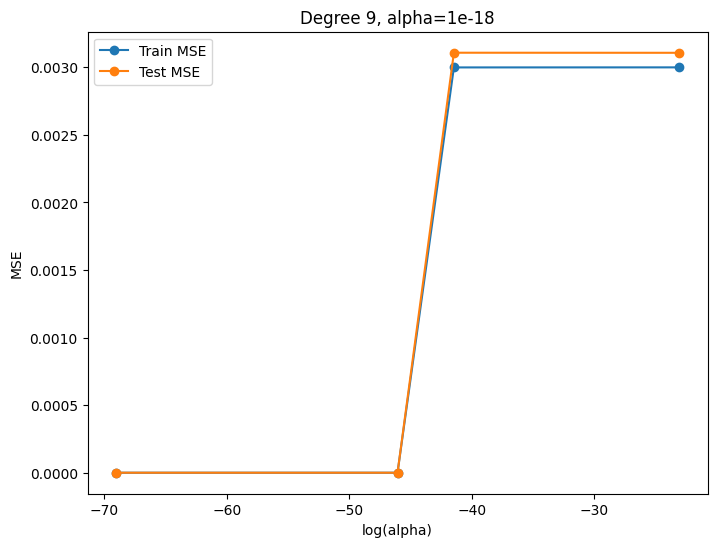

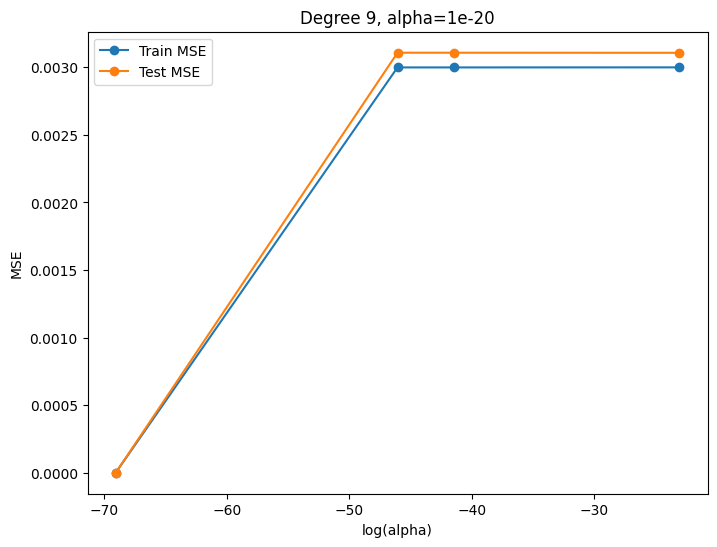

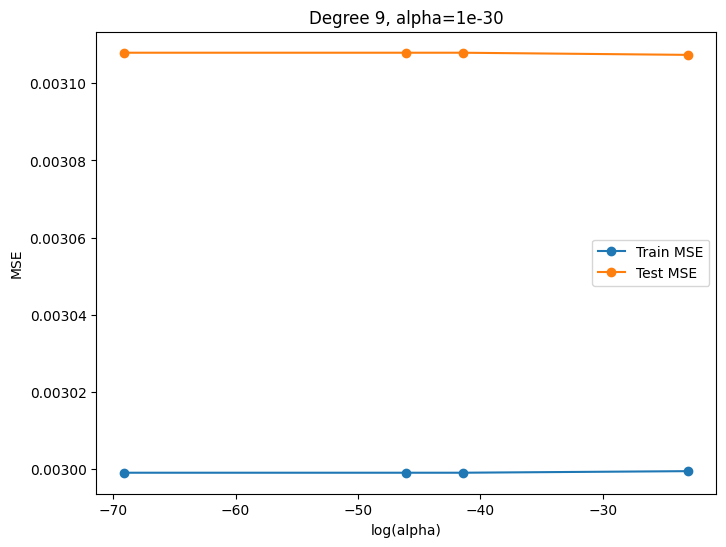

In [60]:
# Initialize arrays to store MSE values
train_mses = np.zeros((len(degrees), len(alphas)))
test_mses = np.zeros((len(degrees), len(alphas)))

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Iterate over degrees and alphas and calculate MSE for each combination
for i, degree in enumerate(degrees):
    for j, alpha in enumerate(alphas):
        # Perform polynomial regression to get weights
        weights = polynomial_regression(X_train.values, y_train.values, degree, alpha)

        # Predict on training and test data
        y_train_pred = predict(X_train.values, weights)
        y_test_pred = predict(X_test.values, weights)

        # Calculate MSE for training and test data
        train_mse = np.mean((y_train - y_train_pred) ** 2)
        test_mse = np.mean((y_test - y_test_pred) ** 2)

        # Store MSE values
        train_mses[i, j] = train_mse
        test_mses[i, j] = test_mse

        # Plot MSE values
        plt.figure(figsize=(8, 6))
        plt.plot(np.log(alphas), train_mses[i, :], label='Train MSE', marker='o')
        plt.plot(np.log(alphas), test_mses[i, :], label='Test MSE', marker='o')
        plt.title(f'Degree {degree}, alpha={alpha}')
        plt.xlabel('log(alpha)')
        plt.ylabel('MSE')
        plt.legend()
        plt.show()


#Model Output vs Target Output

In [1]:
# Define functions for polynomial regression and Ridge regression with regularization

def polynomial_features(X, degree):
    X_poly = np.ones((X.shape[0], 1))
    for d in range(1, degree + 1):
        X_poly = np.concatenate((X_poly, X ** d), axis=1)
    return X_poly

def ridge_regression(X, y, alpha=0.0):
    identity = np.eye(X.shape[1])
    weights = np.linalg.inv(X.T.dot(X) + alpha * identity).dot(X.T).dot(y)
    return weights

# best_degree and best_alpha are obtained from cross-validation results
best_degree = 8
best_alpha = 1e-18

# Perform polynomial regression with regularization
X_train_poly = polynomial_features(X_train, best_degree)
X_test_poly = polynomial_features(X_test, best_degree)

# Add a column of ones for the bias term
X_train_poly = np.c_[np.ones(X_train_poly.shape[0]), X_train_poly]
X_test_poly = np.c_[np.ones(X_test_poly.shape[0]), X_test_poly]

# Compute weights using Ridge regression with the best alpha
weights = ridge_regression(X_train_poly, y_train, alpha=best_alpha)

# Predictions on training and test data
y_train_pred = X_train_poly.dot(weights)
y_test_pred = X_test_poly.dot(weights)

# Plot model output vs target output for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Model Output')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2, label='Target Output')
plt.xlabel('Target Output')
plt.ylabel('Model Output')
plt.title('Training Data: Model Output vs Target Output')
plt.legend()
plt.show()

# Plot model output vs target output for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Model Output')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Target Output')
plt.xlabel('Target Output')
plt.ylabel('Model Output')
plt.title('Test Data: Model Output vs Target Output')
plt.legend()
plt.show()


NameError: ignored